## Дз 7: "Metric learning"

## Цель задания:
Познакомится с алгоритмами metric learning
## Описание задания:
В рамках данного домашнего задания предлагается решить задачу поиска похожего автомобиля в базе данных (автомобиля того же класса). На основе датасета [cars196](https://paperswithcode.com/sota/metric-learning-on-cars196) , ссылка на данные [мета](https://drive.google.com/file/d/1PD-lbbcKSelDeAYKafe3boc5mqqEe7X7/view?usp=sharing) [data](https://drive.google.com/file/d/1l9EnYMC-xGX706SY1kN8RceMmFViASfx/view?usp=sharing).

Процесс выполнения задания следующий:

0. Выбор модели эмбеддера:
    1. Выберите модель кодирующую изображения для выполнения домашнего задания. Любую, кроме модели resnet50.

1. Подготовка обучающего набора данных
    1. Реализуйте корректный класс Dataset и Dataloader для выбранной модели (должен работать форвард вашей модели на том, что выходит из даталоадера).
    2. Добавьте аугментации в датасет **0.5 балла**.

2. Реализация корректного train-loop и обучение модели:  
    1. Реализуйте train-loop для вашей модели и проведите обучение c Triplet loss **2 балла**.
    2. При формировании триплета не просто брать отрицательный класс, а воспользоваться техникой hard negative mining **0.5 балла**.
    3. Обучите модель и воcпользуйте иными loss функциями для задачи metric learning **0.5 балла**.
    4. Полезные ссылки [тык](https://github.com/KevinMusgrave/pytorch-metric-learning)
 
3. Валидация обученных моделей на тестовой выборке, вычисление метрики Recall и Precision
    1. Оцените качество моделей на тестовой части данных и рассчитайте метрики поиска Recall@1, Recall@5, Precision@1, Precision@5. Обратите внимание, что для формирования предсказаний на тестовой выборке вы не должны предсказывать напрямую класс объекта, а должны производить поиск на основе получившихся эмбеддингов (пример в [семинаре](metric_learning.ipynb) блок Faiss). **0.5 балла**
    2. При поиске воспользоваться библиотекой Faiss **0.5 балла**

4. Выводы:
    1. Проанализируйте результаты обучения, визуально оцените качество работы модели.
    2. Прокомментируйте распространенные ошибки модели и предложите пути для улучшения финального решения.
    3. Проинтерпретируйте результаты работы модели с помощью [GradCam](https://github.com/jacobgil/pytorch-grad-cam)  **0.5 балла**

## Срок выполнения задания:
Данное задание можно сдать без штрафов до 18 марта.


In [1]:
!unzip devkit.zip
!unzip archive.zip

Archive:  devkit.zip
   creating: devkit/
  inflating: __MACOSX/._devkit       
  inflating: devkit/cars_test_annos.mat  
  inflating: __MACOSX/devkit/._cars_test_annos.mat  
  inflating: devkit/eval_train.m     
  inflating: __MACOSX/devkit/._eval_train.m  
  inflating: devkit/cars_meta.mat    
  inflating: __MACOSX/devkit/._cars_meta.mat  
  inflating: devkit/README.txt       
  inflating: __MACOSX/devkit/._README.txt  
  inflating: devkit/cars_train_annos.mat  
  inflating: __MACOSX/devkit/._cars_train_annos.mat  
  inflating: devkit/train_perfect_preds.txt  
  inflating: __MACOSX/devkit/._train_perfect_preds.txt  
Archive:  archive.zip
  inflating: cars_annos.mat          
  inflating: cars_test/cars_test/00001.jpg  
  inflating: cars_test/cars_test/00002.jpg  
  inflating: cars_test/cars_test/00003.jpg  
  inflating: cars_test/cars_test/00004.jpg  
  inflating: cars_test/cars_test/00005.jpg  
  inflating: cars_test/cars_test/00006.jpg  
  inflating: cars_test/cars_test/00007.jpg  

  inflating: cars_test/cars_test/00217.jpg  
  inflating: cars_test/cars_test/00218.jpg  
  inflating: cars_test/cars_test/00219.jpg  
  inflating: cars_test/cars_test/00220.jpg  
  inflating: cars_test/cars_test/00221.jpg  
  inflating: cars_test/cars_test/00222.jpg  
  inflating: cars_test/cars_test/00223.jpg  
  inflating: cars_test/cars_test/00224.jpg  
  inflating: cars_test/cars_test/00225.jpg  
  inflating: cars_test/cars_test/00226.jpg  
  inflating: cars_test/cars_test/00227.jpg  
  inflating: cars_test/cars_test/00228.jpg  
  inflating: cars_test/cars_test/00229.jpg  
  inflating: cars_test/cars_test/00230.jpg  
  inflating: cars_test/cars_test/00231.jpg  
  inflating: cars_test/cars_test/00232.jpg  
  inflating: cars_test/cars_test/00233.jpg  
  inflating: cars_test/cars_test/00234.jpg  
  inflating: cars_test/cars_test/00235.jpg  
  inflating: cars_test/cars_test/00236.jpg  
  inflating: cars_test/cars_test/00237.jpg  
  inflating: cars_test/cars_test/00238.jpg  
  inflatin

  inflating: cars_test/cars_test/00421.jpg  
  inflating: cars_test/cars_test/00422.jpg  
  inflating: cars_test/cars_test/00423.jpg  
  inflating: cars_test/cars_test/00424.jpg  
  inflating: cars_test/cars_test/00425.jpg  
  inflating: cars_test/cars_test/00426.jpg  
  inflating: cars_test/cars_test/00427.jpg  
  inflating: cars_test/cars_test/00428.jpg  
  inflating: cars_test/cars_test/00429.jpg  
  inflating: cars_test/cars_test/00430.jpg  
  inflating: cars_test/cars_test/00431.jpg  
  inflating: cars_test/cars_test/00432.jpg  
  inflating: cars_test/cars_test/00433.jpg  
  inflating: cars_test/cars_test/00434.jpg  
  inflating: cars_test/cars_test/00435.jpg  
  inflating: cars_test/cars_test/00436.jpg  
  inflating: cars_test/cars_test/00437.jpg  
  inflating: cars_test/cars_test/00438.jpg  
  inflating: cars_test/cars_test/00439.jpg  
  inflating: cars_test/cars_test/00440.jpg  
  inflating: cars_test/cars_test/00441.jpg  
  inflating: cars_test/cars_test/00442.jpg  
  inflatin

  inflating: cars_test/cars_test/00647.jpg  
  inflating: cars_test/cars_test/00648.jpg  
  inflating: cars_test/cars_test/00649.jpg  
  inflating: cars_test/cars_test/00650.jpg  
  inflating: cars_test/cars_test/00651.jpg  
  inflating: cars_test/cars_test/00652.jpg  
  inflating: cars_test/cars_test/00653.jpg  
  inflating: cars_test/cars_test/00654.jpg  
  inflating: cars_test/cars_test/00655.jpg  
  inflating: cars_test/cars_test/00656.jpg  
  inflating: cars_test/cars_test/00657.jpg  
  inflating: cars_test/cars_test/00658.jpg  
  inflating: cars_test/cars_test/00659.jpg  
  inflating: cars_test/cars_test/00660.jpg  
  inflating: cars_test/cars_test/00661.jpg  
  inflating: cars_test/cars_test/00662.jpg  
  inflating: cars_test/cars_test/00663.jpg  
  inflating: cars_test/cars_test/00664.jpg  
  inflating: cars_test/cars_test/00665.jpg  
  inflating: cars_test/cars_test/00666.jpg  
  inflating: cars_test/cars_test/00667.jpg  
  inflating: cars_test/cars_test/00668.jpg  
  inflatin

  inflating: cars_test/cars_test/00854.jpg  
  inflating: cars_test/cars_test/00855.jpg  
  inflating: cars_test/cars_test/00856.jpg  
  inflating: cars_test/cars_test/00857.jpg  
  inflating: cars_test/cars_test/00858.jpg  
  inflating: cars_test/cars_test/00859.jpg  
  inflating: cars_test/cars_test/00860.jpg  
  inflating: cars_test/cars_test/00861.jpg  
  inflating: cars_test/cars_test/00862.jpg  
  inflating: cars_test/cars_test/00863.jpg  
  inflating: cars_test/cars_test/00864.jpg  
  inflating: cars_test/cars_test/00865.jpg  
  inflating: cars_test/cars_test/00866.jpg  
  inflating: cars_test/cars_test/00867.jpg  
  inflating: cars_test/cars_test/00868.jpg  
  inflating: cars_test/cars_test/00869.jpg  
  inflating: cars_test/cars_test/00870.jpg  
  inflating: cars_test/cars_test/00871.jpg  
  inflating: cars_test/cars_test/00872.jpg  
  inflating: cars_test/cars_test/00873.jpg  
  inflating: cars_test/cars_test/00874.jpg  
  inflating: cars_test/cars_test/00875.jpg  
  inflatin

  inflating: cars_test/cars_test/01095.jpg  
  inflating: cars_test/cars_test/01096.jpg  
  inflating: cars_test/cars_test/01097.jpg  
  inflating: cars_test/cars_test/01098.jpg  
  inflating: cars_test/cars_test/01099.jpg  
  inflating: cars_test/cars_test/01100.jpg  
  inflating: cars_test/cars_test/01101.jpg  
  inflating: cars_test/cars_test/01102.jpg  
  inflating: cars_test/cars_test/01103.jpg  
  inflating: cars_test/cars_test/01104.jpg  
  inflating: cars_test/cars_test/01105.jpg  
  inflating: cars_test/cars_test/01106.jpg  
  inflating: cars_test/cars_test/01107.jpg  
  inflating: cars_test/cars_test/01108.jpg  
  inflating: cars_test/cars_test/01109.jpg  
  inflating: cars_test/cars_test/01110.jpg  
  inflating: cars_test/cars_test/01111.jpg  
  inflating: cars_test/cars_test/01112.jpg  
  inflating: cars_test/cars_test/01113.jpg  
  inflating: cars_test/cars_test/01114.jpg  
  inflating: cars_test/cars_test/01115.jpg  
  inflating: cars_test/cars_test/01116.jpg  
  inflatin

  inflating: cars_test/cars_test/01287.jpg  
  inflating: cars_test/cars_test/01288.jpg  
  inflating: cars_test/cars_test/01289.jpg  
  inflating: cars_test/cars_test/01290.jpg  
  inflating: cars_test/cars_test/01291.jpg  
  inflating: cars_test/cars_test/01292.jpg  
  inflating: cars_test/cars_test/01293.jpg  
  inflating: cars_test/cars_test/01294.jpg  
  inflating: cars_test/cars_test/01295.jpg  
  inflating: cars_test/cars_test/01296.jpg  
  inflating: cars_test/cars_test/01297.jpg  
  inflating: cars_test/cars_test/01298.jpg  
  inflating: cars_test/cars_test/01299.jpg  
  inflating: cars_test/cars_test/01300.jpg  
  inflating: cars_test/cars_test/01301.jpg  
  inflating: cars_test/cars_test/01302.jpg  
  inflating: cars_test/cars_test/01303.jpg  
  inflating: cars_test/cars_test/01304.jpg  
  inflating: cars_test/cars_test/01305.jpg  
  inflating: cars_test/cars_test/01306.jpg  
  inflating: cars_test/cars_test/01307.jpg  
  inflating: cars_test/cars_test/01308.jpg  
  inflatin

  inflating: cars_test/cars_test/01471.jpg  
  inflating: cars_test/cars_test/01472.jpg  
  inflating: cars_test/cars_test/01473.jpg  
  inflating: cars_test/cars_test/01474.jpg  
  inflating: cars_test/cars_test/01475.jpg  
  inflating: cars_test/cars_test/01476.jpg  
  inflating: cars_test/cars_test/01477.jpg  
  inflating: cars_test/cars_test/01478.jpg  
  inflating: cars_test/cars_test/01479.jpg  
  inflating: cars_test/cars_test/01480.jpg  
  inflating: cars_test/cars_test/01481.jpg  
  inflating: cars_test/cars_test/01482.jpg  
  inflating: cars_test/cars_test/01483.jpg  
  inflating: cars_test/cars_test/01484.jpg  
  inflating: cars_test/cars_test/01485.jpg  
  inflating: cars_test/cars_test/01486.jpg  
  inflating: cars_test/cars_test/01487.jpg  
  inflating: cars_test/cars_test/01488.jpg  
  inflating: cars_test/cars_test/01489.jpg  
  inflating: cars_test/cars_test/01490.jpg  
  inflating: cars_test/cars_test/01491.jpg  
  inflating: cars_test/cars_test/01492.jpg  
  inflatin

  inflating: cars_test/cars_test/01658.jpg  
  inflating: cars_test/cars_test/01659.jpg  
  inflating: cars_test/cars_test/01660.jpg  
  inflating: cars_test/cars_test/01661.jpg  
  inflating: cars_test/cars_test/01662.jpg  
  inflating: cars_test/cars_test/01663.jpg  
  inflating: cars_test/cars_test/01664.jpg  
  inflating: cars_test/cars_test/01665.jpg  
  inflating: cars_test/cars_test/01666.jpg  
  inflating: cars_test/cars_test/01667.jpg  
  inflating: cars_test/cars_test/01668.jpg  
  inflating: cars_test/cars_test/01669.jpg  
  inflating: cars_test/cars_test/01670.jpg  
  inflating: cars_test/cars_test/01671.jpg  
  inflating: cars_test/cars_test/01672.jpg  
  inflating: cars_test/cars_test/01673.jpg  
  inflating: cars_test/cars_test/01674.jpg  
  inflating: cars_test/cars_test/01675.jpg  
  inflating: cars_test/cars_test/01676.jpg  
  inflating: cars_test/cars_test/01677.jpg  
  inflating: cars_test/cars_test/01678.jpg  
  inflating: cars_test/cars_test/01679.jpg  
  inflatin

  inflating: cars_test/cars_test/01869.jpg  
  inflating: cars_test/cars_test/01870.jpg  
  inflating: cars_test/cars_test/01871.jpg  
  inflating: cars_test/cars_test/01872.jpg  
  inflating: cars_test/cars_test/01873.jpg  
  inflating: cars_test/cars_test/01874.jpg  
  inflating: cars_test/cars_test/01875.jpg  
  inflating: cars_test/cars_test/01876.jpg  
  inflating: cars_test/cars_test/01877.jpg  
  inflating: cars_test/cars_test/01878.jpg  
  inflating: cars_test/cars_test/01879.jpg  
  inflating: cars_test/cars_test/01880.jpg  
  inflating: cars_test/cars_test/01881.jpg  
  inflating: cars_test/cars_test/01882.jpg  
  inflating: cars_test/cars_test/01883.jpg  
  inflating: cars_test/cars_test/01884.jpg  
  inflating: cars_test/cars_test/01885.jpg  
  inflating: cars_test/cars_test/01886.jpg  
  inflating: cars_test/cars_test/01887.jpg  
  inflating: cars_test/cars_test/01888.jpg  
  inflating: cars_test/cars_test/01889.jpg  
  inflating: cars_test/cars_test/01890.jpg  
  inflatin

  inflating: cars_test/cars_test/02101.jpg  
  inflating: cars_test/cars_test/02102.jpg  
  inflating: cars_test/cars_test/02103.jpg  
  inflating: cars_test/cars_test/02104.jpg  
  inflating: cars_test/cars_test/02105.jpg  
  inflating: cars_test/cars_test/02106.jpg  
  inflating: cars_test/cars_test/02107.jpg  
  inflating: cars_test/cars_test/02108.jpg  
  inflating: cars_test/cars_test/02109.jpg  
  inflating: cars_test/cars_test/02110.jpg  
  inflating: cars_test/cars_test/02111.jpg  
  inflating: cars_test/cars_test/02112.jpg  
  inflating: cars_test/cars_test/02113.jpg  
  inflating: cars_test/cars_test/02114.jpg  
  inflating: cars_test/cars_test/02115.jpg  
  inflating: cars_test/cars_test/02116.jpg  
  inflating: cars_test/cars_test/02117.jpg  
  inflating: cars_test/cars_test/02118.jpg  
  inflating: cars_test/cars_test/02119.jpg  
  inflating: cars_test/cars_test/02120.jpg  
  inflating: cars_test/cars_test/02121.jpg  
  inflating: cars_test/cars_test/02122.jpg  
  inflatin

  inflating: cars_test/cars_test/02292.jpg  
  inflating: cars_test/cars_test/02293.jpg  
  inflating: cars_test/cars_test/02294.jpg  
  inflating: cars_test/cars_test/02295.jpg  
  inflating: cars_test/cars_test/02296.jpg  
  inflating: cars_test/cars_test/02297.jpg  
  inflating: cars_test/cars_test/02298.jpg  
  inflating: cars_test/cars_test/02299.jpg  
  inflating: cars_test/cars_test/02300.jpg  
  inflating: cars_test/cars_test/02301.jpg  
  inflating: cars_test/cars_test/02302.jpg  
  inflating: cars_test/cars_test/02303.jpg  
  inflating: cars_test/cars_test/02304.jpg  
  inflating: cars_test/cars_test/02305.jpg  
  inflating: cars_test/cars_test/02306.jpg  
  inflating: cars_test/cars_test/02307.jpg  
  inflating: cars_test/cars_test/02308.jpg  
  inflating: cars_test/cars_test/02309.jpg  
  inflating: cars_test/cars_test/02310.jpg  
  inflating: cars_test/cars_test/02311.jpg  
  inflating: cars_test/cars_test/02312.jpg  
  inflating: cars_test/cars_test/02313.jpg  
  inflatin

  inflating: cars_test/cars_test/02475.jpg  
  inflating: cars_test/cars_test/02476.jpg  
  inflating: cars_test/cars_test/02477.jpg  
  inflating: cars_test/cars_test/02478.jpg  
  inflating: cars_test/cars_test/02479.jpg  
  inflating: cars_test/cars_test/02480.jpg  
  inflating: cars_test/cars_test/02481.jpg  
  inflating: cars_test/cars_test/02482.jpg  
  inflating: cars_test/cars_test/02483.jpg  
  inflating: cars_test/cars_test/02484.jpg  
  inflating: cars_test/cars_test/02485.jpg  
  inflating: cars_test/cars_test/02486.jpg  
  inflating: cars_test/cars_test/02487.jpg  
  inflating: cars_test/cars_test/02488.jpg  
  inflating: cars_test/cars_test/02489.jpg  
  inflating: cars_test/cars_test/02490.jpg  
  inflating: cars_test/cars_test/02491.jpg  
  inflating: cars_test/cars_test/02492.jpg  
  inflating: cars_test/cars_test/02493.jpg  
  inflating: cars_test/cars_test/02494.jpg  
  inflating: cars_test/cars_test/02495.jpg  
  inflating: cars_test/cars_test/02496.jpg  
  inflatin

  inflating: cars_test/cars_test/02718.jpg  
  inflating: cars_test/cars_test/02719.jpg  
  inflating: cars_test/cars_test/02720.jpg  
  inflating: cars_test/cars_test/02721.jpg  
  inflating: cars_test/cars_test/02722.jpg  
  inflating: cars_test/cars_test/02723.jpg  
  inflating: cars_test/cars_test/02724.jpg  
  inflating: cars_test/cars_test/02725.jpg  
  inflating: cars_test/cars_test/02726.jpg  
  inflating: cars_test/cars_test/02727.jpg  
  inflating: cars_test/cars_test/02728.jpg  
  inflating: cars_test/cars_test/02729.jpg  
  inflating: cars_test/cars_test/02730.jpg  
  inflating: cars_test/cars_test/02731.jpg  
  inflating: cars_test/cars_test/02732.jpg  
  inflating: cars_test/cars_test/02733.jpg  
  inflating: cars_test/cars_test/02734.jpg  
  inflating: cars_test/cars_test/02735.jpg  
  inflating: cars_test/cars_test/02736.jpg  
  inflating: cars_test/cars_test/02737.jpg  
  inflating: cars_test/cars_test/02738.jpg  
  inflating: cars_test/cars_test/02739.jpg  
  inflatin

  inflating: cars_test/cars_test/02948.jpg  
  inflating: cars_test/cars_test/02949.jpg  
  inflating: cars_test/cars_test/02950.jpg  
  inflating: cars_test/cars_test/02951.jpg  
  inflating: cars_test/cars_test/02952.jpg  
  inflating: cars_test/cars_test/02953.jpg  
  inflating: cars_test/cars_test/02954.jpg  
  inflating: cars_test/cars_test/02955.jpg  
  inflating: cars_test/cars_test/02956.jpg  
  inflating: cars_test/cars_test/02957.jpg  
  inflating: cars_test/cars_test/02958.jpg  
  inflating: cars_test/cars_test/02959.jpg  
  inflating: cars_test/cars_test/02960.jpg  
  inflating: cars_test/cars_test/02961.jpg  
  inflating: cars_test/cars_test/02962.jpg  
  inflating: cars_test/cars_test/02963.jpg  
  inflating: cars_test/cars_test/02964.jpg  
  inflating: cars_test/cars_test/02965.jpg  
  inflating: cars_test/cars_test/02966.jpg  
  inflating: cars_test/cars_test/02967.jpg  
  inflating: cars_test/cars_test/02968.jpg  
  inflating: cars_test/cars_test/02969.jpg  
  inflatin

  inflating: cars_test/cars_test/03154.jpg  
  inflating: cars_test/cars_test/03155.jpg  
  inflating: cars_test/cars_test/03156.jpg  
  inflating: cars_test/cars_test/03157.jpg  
  inflating: cars_test/cars_test/03158.jpg  
  inflating: cars_test/cars_test/03159.jpg  
  inflating: cars_test/cars_test/03160.jpg  
  inflating: cars_test/cars_test/03161.jpg  
  inflating: cars_test/cars_test/03162.jpg  
  inflating: cars_test/cars_test/03163.jpg  
  inflating: cars_test/cars_test/03164.jpg  
  inflating: cars_test/cars_test/03165.jpg  
  inflating: cars_test/cars_test/03166.jpg  
  inflating: cars_test/cars_test/03167.jpg  
  inflating: cars_test/cars_test/03168.jpg  
  inflating: cars_test/cars_test/03169.jpg  
  inflating: cars_test/cars_test/03170.jpg  
  inflating: cars_test/cars_test/03171.jpg  
  inflating: cars_test/cars_test/03172.jpg  
  inflating: cars_test/cars_test/03173.jpg  
  inflating: cars_test/cars_test/03174.jpg  
  inflating: cars_test/cars_test/03175.jpg  
  inflatin

  inflating: cars_test/cars_test/03339.jpg  
  inflating: cars_test/cars_test/03340.jpg  
  inflating: cars_test/cars_test/03341.jpg  
  inflating: cars_test/cars_test/03342.jpg  
  inflating: cars_test/cars_test/03343.jpg  
  inflating: cars_test/cars_test/03344.jpg  
  inflating: cars_test/cars_test/03345.jpg  
  inflating: cars_test/cars_test/03346.jpg  
  inflating: cars_test/cars_test/03347.jpg  
  inflating: cars_test/cars_test/03348.jpg  
  inflating: cars_test/cars_test/03349.jpg  
  inflating: cars_test/cars_test/03350.jpg  
  inflating: cars_test/cars_test/03351.jpg  
  inflating: cars_test/cars_test/03352.jpg  
  inflating: cars_test/cars_test/03353.jpg  
  inflating: cars_test/cars_test/03354.jpg  
  inflating: cars_test/cars_test/03355.jpg  
  inflating: cars_test/cars_test/03356.jpg  
  inflating: cars_test/cars_test/03357.jpg  
  inflating: cars_test/cars_test/03358.jpg  
  inflating: cars_test/cars_test/03359.jpg  
  inflating: cars_test/cars_test/03360.jpg  
  inflatin

  inflating: cars_test/cars_test/03570.jpg  
  inflating: cars_test/cars_test/03571.jpg  
  inflating: cars_test/cars_test/03572.jpg  
  inflating: cars_test/cars_test/03573.jpg  
  inflating: cars_test/cars_test/03574.jpg  
  inflating: cars_test/cars_test/03575.jpg  
  inflating: cars_test/cars_test/03576.jpg  
  inflating: cars_test/cars_test/03577.jpg  
  inflating: cars_test/cars_test/03578.jpg  
  inflating: cars_test/cars_test/03579.jpg  
  inflating: cars_test/cars_test/03580.jpg  
  inflating: cars_test/cars_test/03581.jpg  
  inflating: cars_test/cars_test/03582.jpg  
  inflating: cars_test/cars_test/03583.jpg  
  inflating: cars_test/cars_test/03584.jpg  
  inflating: cars_test/cars_test/03585.jpg  
  inflating: cars_test/cars_test/03586.jpg  
  inflating: cars_test/cars_test/03587.jpg  
  inflating: cars_test/cars_test/03588.jpg  
  inflating: cars_test/cars_test/03589.jpg  
  inflating: cars_test/cars_test/03590.jpg  
  inflating: cars_test/cars_test/03591.jpg  
  inflatin

  inflating: cars_test/cars_test/03760.jpg  
  inflating: cars_test/cars_test/03761.jpg  
  inflating: cars_test/cars_test/03762.jpg  
  inflating: cars_test/cars_test/03763.jpg  
  inflating: cars_test/cars_test/03764.jpg  
  inflating: cars_test/cars_test/03765.jpg  
  inflating: cars_test/cars_test/03766.jpg  
  inflating: cars_test/cars_test/03767.jpg  
  inflating: cars_test/cars_test/03768.jpg  
  inflating: cars_test/cars_test/03769.jpg  
  inflating: cars_test/cars_test/03770.jpg  
  inflating: cars_test/cars_test/03771.jpg  
  inflating: cars_test/cars_test/03772.jpg  
  inflating: cars_test/cars_test/03773.jpg  
  inflating: cars_test/cars_test/03774.jpg  
  inflating: cars_test/cars_test/03775.jpg  
  inflating: cars_test/cars_test/03776.jpg  
  inflating: cars_test/cars_test/03777.jpg  
  inflating: cars_test/cars_test/03778.jpg  
  inflating: cars_test/cars_test/03779.jpg  
  inflating: cars_test/cars_test/03780.jpg  
  inflating: cars_test/cars_test/03781.jpg  
  inflatin

  inflating: cars_test/cars_test/03974.jpg  
  inflating: cars_test/cars_test/03975.jpg  
  inflating: cars_test/cars_test/03976.jpg  
  inflating: cars_test/cars_test/03977.jpg  
  inflating: cars_test/cars_test/03978.jpg  
  inflating: cars_test/cars_test/03979.jpg  
  inflating: cars_test/cars_test/03980.jpg  
  inflating: cars_test/cars_test/03981.jpg  
  inflating: cars_test/cars_test/03982.jpg  
  inflating: cars_test/cars_test/03983.jpg  
  inflating: cars_test/cars_test/03984.jpg  
  inflating: cars_test/cars_test/03985.jpg  
  inflating: cars_test/cars_test/03986.jpg  
  inflating: cars_test/cars_test/03987.jpg  
  inflating: cars_test/cars_test/03988.jpg  
  inflating: cars_test/cars_test/03989.jpg  
  inflating: cars_test/cars_test/03990.jpg  
  inflating: cars_test/cars_test/03991.jpg  
  inflating: cars_test/cars_test/03992.jpg  
  inflating: cars_test/cars_test/03993.jpg  
  inflating: cars_test/cars_test/03994.jpg  
  inflating: cars_test/cars_test/03995.jpg  
  inflatin

  inflating: cars_test/cars_test/04161.jpg  
  inflating: cars_test/cars_test/04162.jpg  
  inflating: cars_test/cars_test/04163.jpg  
  inflating: cars_test/cars_test/04164.jpg  
  inflating: cars_test/cars_test/04165.jpg  
  inflating: cars_test/cars_test/04166.jpg  
  inflating: cars_test/cars_test/04167.jpg  
  inflating: cars_test/cars_test/04168.jpg  
  inflating: cars_test/cars_test/04169.jpg  
  inflating: cars_test/cars_test/04170.jpg  
  inflating: cars_test/cars_test/04171.jpg  
  inflating: cars_test/cars_test/04172.jpg  
  inflating: cars_test/cars_test/04173.jpg  
  inflating: cars_test/cars_test/04174.jpg  
  inflating: cars_test/cars_test/04175.jpg  
  inflating: cars_test/cars_test/04176.jpg  
  inflating: cars_test/cars_test/04177.jpg  
  inflating: cars_test/cars_test/04178.jpg  
  inflating: cars_test/cars_test/04179.jpg  
  inflating: cars_test/cars_test/04180.jpg  
  inflating: cars_test/cars_test/04181.jpg  
  inflating: cars_test/cars_test/04182.jpg  
  inflatin

  inflating: cars_test/cars_test/04371.jpg  
  inflating: cars_test/cars_test/04372.jpg  
  inflating: cars_test/cars_test/04373.jpg  
  inflating: cars_test/cars_test/04374.jpg  
  inflating: cars_test/cars_test/04375.jpg  
  inflating: cars_test/cars_test/04376.jpg  
  inflating: cars_test/cars_test/04377.jpg  
  inflating: cars_test/cars_test/04378.jpg  
  inflating: cars_test/cars_test/04379.jpg  
  inflating: cars_test/cars_test/04380.jpg  
  inflating: cars_test/cars_test/04381.jpg  
  inflating: cars_test/cars_test/04382.jpg  
  inflating: cars_test/cars_test/04383.jpg  
  inflating: cars_test/cars_test/04384.jpg  
  inflating: cars_test/cars_test/04385.jpg  
  inflating: cars_test/cars_test/04386.jpg  
  inflating: cars_test/cars_test/04387.jpg  
  inflating: cars_test/cars_test/04388.jpg  
  inflating: cars_test/cars_test/04389.jpg  
  inflating: cars_test/cars_test/04390.jpg  
  inflating: cars_test/cars_test/04391.jpg  
  inflating: cars_test/cars_test/04392.jpg  
  inflatin

  inflating: cars_test/cars_test/04582.jpg  
  inflating: cars_test/cars_test/04583.jpg  
  inflating: cars_test/cars_test/04584.jpg  
  inflating: cars_test/cars_test/04585.jpg  
  inflating: cars_test/cars_test/04586.jpg  
  inflating: cars_test/cars_test/04587.jpg  
  inflating: cars_test/cars_test/04588.jpg  
  inflating: cars_test/cars_test/04589.jpg  
  inflating: cars_test/cars_test/04590.jpg  
  inflating: cars_test/cars_test/04591.jpg  
  inflating: cars_test/cars_test/04592.jpg  
  inflating: cars_test/cars_test/04593.jpg  
  inflating: cars_test/cars_test/04594.jpg  
  inflating: cars_test/cars_test/04595.jpg  
  inflating: cars_test/cars_test/04596.jpg  
  inflating: cars_test/cars_test/04597.jpg  
  inflating: cars_test/cars_test/04598.jpg  
  inflating: cars_test/cars_test/04599.jpg  
  inflating: cars_test/cars_test/04600.jpg  
  inflating: cars_test/cars_test/04601.jpg  
  inflating: cars_test/cars_test/04602.jpg  
  inflating: cars_test/cars_test/04603.jpg  
  inflatin

  inflating: cars_test/cars_test/04792.jpg  
  inflating: cars_test/cars_test/04793.jpg  
  inflating: cars_test/cars_test/04794.jpg  
  inflating: cars_test/cars_test/04795.jpg  
  inflating: cars_test/cars_test/04796.jpg  
  inflating: cars_test/cars_test/04797.jpg  
  inflating: cars_test/cars_test/04798.jpg  
  inflating: cars_test/cars_test/04799.jpg  
  inflating: cars_test/cars_test/04800.jpg  
  inflating: cars_test/cars_test/04801.jpg  
  inflating: cars_test/cars_test/04802.jpg  
  inflating: cars_test/cars_test/04803.jpg  
  inflating: cars_test/cars_test/04804.jpg  
  inflating: cars_test/cars_test/04805.jpg  
  inflating: cars_test/cars_test/04806.jpg  
  inflating: cars_test/cars_test/04807.jpg  
  inflating: cars_test/cars_test/04808.jpg  
  inflating: cars_test/cars_test/04809.jpg  
  inflating: cars_test/cars_test/04810.jpg  
  inflating: cars_test/cars_test/04811.jpg  
  inflating: cars_test/cars_test/04812.jpg  
  inflating: cars_test/cars_test/04813.jpg  
  inflatin

  inflating: cars_test/cars_test/04978.jpg  
  inflating: cars_test/cars_test/04979.jpg  
  inflating: cars_test/cars_test/04980.jpg  
  inflating: cars_test/cars_test/04981.jpg  
  inflating: cars_test/cars_test/04982.jpg  
  inflating: cars_test/cars_test/04983.jpg  
  inflating: cars_test/cars_test/04984.jpg  
  inflating: cars_test/cars_test/04985.jpg  
  inflating: cars_test/cars_test/04986.jpg  
  inflating: cars_test/cars_test/04987.jpg  
  inflating: cars_test/cars_test/04988.jpg  
  inflating: cars_test/cars_test/04989.jpg  
  inflating: cars_test/cars_test/04990.jpg  
  inflating: cars_test/cars_test/04991.jpg  
  inflating: cars_test/cars_test/04992.jpg  
  inflating: cars_test/cars_test/04993.jpg  
  inflating: cars_test/cars_test/04994.jpg  
  inflating: cars_test/cars_test/04995.jpg  
  inflating: cars_test/cars_test/04996.jpg  
  inflating: cars_test/cars_test/04997.jpg  
  inflating: cars_test/cars_test/04998.jpg  
  inflating: cars_test/cars_test/04999.jpg  
  inflatin

  inflating: cars_test/cars_test/05218.jpg  
  inflating: cars_test/cars_test/05219.jpg  
  inflating: cars_test/cars_test/05220.jpg  
  inflating: cars_test/cars_test/05221.jpg  
  inflating: cars_test/cars_test/05222.jpg  
  inflating: cars_test/cars_test/05223.jpg  
  inflating: cars_test/cars_test/05224.jpg  
  inflating: cars_test/cars_test/05225.jpg  
  inflating: cars_test/cars_test/05226.jpg  
  inflating: cars_test/cars_test/05227.jpg  
  inflating: cars_test/cars_test/05228.jpg  
  inflating: cars_test/cars_test/05229.jpg  
  inflating: cars_test/cars_test/05230.jpg  
  inflating: cars_test/cars_test/05231.jpg  
  inflating: cars_test/cars_test/05232.jpg  
  inflating: cars_test/cars_test/05233.jpg  
  inflating: cars_test/cars_test/05234.jpg  
  inflating: cars_test/cars_test/05235.jpg  
  inflating: cars_test/cars_test/05236.jpg  
  inflating: cars_test/cars_test/05237.jpg  
  inflating: cars_test/cars_test/05238.jpg  
  inflating: cars_test/cars_test/05239.jpg  
  inflatin

  inflating: cars_test/cars_test/05414.jpg  
  inflating: cars_test/cars_test/05415.jpg  
  inflating: cars_test/cars_test/05416.jpg  
  inflating: cars_test/cars_test/05417.jpg  
  inflating: cars_test/cars_test/05418.jpg  
  inflating: cars_test/cars_test/05419.jpg  
  inflating: cars_test/cars_test/05420.jpg  
  inflating: cars_test/cars_test/05421.jpg  
  inflating: cars_test/cars_test/05422.jpg  
  inflating: cars_test/cars_test/05423.jpg  
  inflating: cars_test/cars_test/05424.jpg  
  inflating: cars_test/cars_test/05425.jpg  
  inflating: cars_test/cars_test/05426.jpg  
  inflating: cars_test/cars_test/05427.jpg  
  inflating: cars_test/cars_test/05428.jpg  
  inflating: cars_test/cars_test/05429.jpg  
  inflating: cars_test/cars_test/05430.jpg  
  inflating: cars_test/cars_test/05431.jpg  
  inflating: cars_test/cars_test/05432.jpg  
  inflating: cars_test/cars_test/05433.jpg  
  inflating: cars_test/cars_test/05434.jpg  
  inflating: cars_test/cars_test/05435.jpg  
  inflatin

  inflating: cars_test/cars_test/05599.jpg  
  inflating: cars_test/cars_test/05600.jpg  
  inflating: cars_test/cars_test/05601.jpg  
  inflating: cars_test/cars_test/05602.jpg  
  inflating: cars_test/cars_test/05603.jpg  
  inflating: cars_test/cars_test/05604.jpg  
  inflating: cars_test/cars_test/05605.jpg  
  inflating: cars_test/cars_test/05606.jpg  
  inflating: cars_test/cars_test/05607.jpg  
  inflating: cars_test/cars_test/05608.jpg  
  inflating: cars_test/cars_test/05609.jpg  
  inflating: cars_test/cars_test/05610.jpg  
  inflating: cars_test/cars_test/05611.jpg  
  inflating: cars_test/cars_test/05612.jpg  
  inflating: cars_test/cars_test/05613.jpg  
  inflating: cars_test/cars_test/05614.jpg  
  inflating: cars_test/cars_test/05615.jpg  
  inflating: cars_test/cars_test/05616.jpg  
  inflating: cars_test/cars_test/05617.jpg  
  inflating: cars_test/cars_test/05618.jpg  
  inflating: cars_test/cars_test/05619.jpg  
  inflating: cars_test/cars_test/05620.jpg  
  inflatin

  inflating: cars_test/cars_test/05818.jpg  
  inflating: cars_test/cars_test/05819.jpg  
  inflating: cars_test/cars_test/05820.jpg  
  inflating: cars_test/cars_test/05821.jpg  
  inflating: cars_test/cars_test/05822.jpg  
  inflating: cars_test/cars_test/05823.jpg  
  inflating: cars_test/cars_test/05824.jpg  
  inflating: cars_test/cars_test/05825.jpg  
  inflating: cars_test/cars_test/05826.jpg  
  inflating: cars_test/cars_test/05827.jpg  
  inflating: cars_test/cars_test/05828.jpg  
  inflating: cars_test/cars_test/05829.jpg  
  inflating: cars_test/cars_test/05830.jpg  
  inflating: cars_test/cars_test/05831.jpg  
  inflating: cars_test/cars_test/05832.jpg  
  inflating: cars_test/cars_test/05833.jpg  
  inflating: cars_test/cars_test/05834.jpg  
  inflating: cars_test/cars_test/05835.jpg  
  inflating: cars_test/cars_test/05836.jpg  
  inflating: cars_test/cars_test/05837.jpg  
  inflating: cars_test/cars_test/05838.jpg  
  inflating: cars_test/cars_test/05839.jpg  
  inflatin

  inflating: cars_test/cars_test/06054.jpg  
  inflating: cars_test/cars_test/06055.jpg  
  inflating: cars_test/cars_test/06056.jpg  
  inflating: cars_test/cars_test/06057.jpg  
  inflating: cars_test/cars_test/06058.jpg  
  inflating: cars_test/cars_test/06059.jpg  
  inflating: cars_test/cars_test/06060.jpg  
  inflating: cars_test/cars_test/06061.jpg  
  inflating: cars_test/cars_test/06062.jpg  
  inflating: cars_test/cars_test/06063.jpg  
  inflating: cars_test/cars_test/06064.jpg  
  inflating: cars_test/cars_test/06065.jpg  
  inflating: cars_test/cars_test/06066.jpg  
  inflating: cars_test/cars_test/06067.jpg  
  inflating: cars_test/cars_test/06068.jpg  
  inflating: cars_test/cars_test/06069.jpg  
  inflating: cars_test/cars_test/06070.jpg  
  inflating: cars_test/cars_test/06071.jpg  
  inflating: cars_test/cars_test/06072.jpg  
  inflating: cars_test/cars_test/06073.jpg  
  inflating: cars_test/cars_test/06074.jpg  
  inflating: cars_test/cars_test/06075.jpg  
  inflatin

  inflating: cars_test/cars_test/06273.jpg  
  inflating: cars_test/cars_test/06274.jpg  
  inflating: cars_test/cars_test/06275.jpg  
  inflating: cars_test/cars_test/06276.jpg  
  inflating: cars_test/cars_test/06277.jpg  
  inflating: cars_test/cars_test/06278.jpg  
  inflating: cars_test/cars_test/06279.jpg  
  inflating: cars_test/cars_test/06280.jpg  
  inflating: cars_test/cars_test/06281.jpg  
  inflating: cars_test/cars_test/06282.jpg  
  inflating: cars_test/cars_test/06283.jpg  
  inflating: cars_test/cars_test/06284.jpg  
  inflating: cars_test/cars_test/06285.jpg  
  inflating: cars_test/cars_test/06286.jpg  
  inflating: cars_test/cars_test/06287.jpg  
  inflating: cars_test/cars_test/06288.jpg  
  inflating: cars_test/cars_test/06289.jpg  
  inflating: cars_test/cars_test/06290.jpg  
  inflating: cars_test/cars_test/06291.jpg  
  inflating: cars_test/cars_test/06292.jpg  
  inflating: cars_test/cars_test/06293.jpg  
  inflating: cars_test/cars_test/06294.jpg  
  inflatin

  inflating: cars_test/cars_test/06456.jpg  
  inflating: cars_test/cars_test/06457.jpg  
  inflating: cars_test/cars_test/06458.jpg  
  inflating: cars_test/cars_test/06459.jpg  
  inflating: cars_test/cars_test/06460.jpg  
  inflating: cars_test/cars_test/06461.jpg  
  inflating: cars_test/cars_test/06462.jpg  
  inflating: cars_test/cars_test/06463.jpg  
  inflating: cars_test/cars_test/06464.jpg  
  inflating: cars_test/cars_test/06465.jpg  
  inflating: cars_test/cars_test/06466.jpg  
  inflating: cars_test/cars_test/06467.jpg  
  inflating: cars_test/cars_test/06468.jpg  
  inflating: cars_test/cars_test/06469.jpg  
  inflating: cars_test/cars_test/06470.jpg  
  inflating: cars_test/cars_test/06471.jpg  
  inflating: cars_test/cars_test/06472.jpg  
  inflating: cars_test/cars_test/06473.jpg  
  inflating: cars_test/cars_test/06474.jpg  
  inflating: cars_test/cars_test/06475.jpg  
  inflating: cars_test/cars_test/06476.jpg  
  inflating: cars_test/cars_test/06477.jpg  
  inflatin

  inflating: cars_test/cars_test/06683.jpg  
  inflating: cars_test/cars_test/06684.jpg  
  inflating: cars_test/cars_test/06685.jpg  
  inflating: cars_test/cars_test/06686.jpg  
  inflating: cars_test/cars_test/06687.jpg  
  inflating: cars_test/cars_test/06688.jpg  
  inflating: cars_test/cars_test/06689.jpg  
  inflating: cars_test/cars_test/06690.jpg  
  inflating: cars_test/cars_test/06691.jpg  
  inflating: cars_test/cars_test/06692.jpg  
  inflating: cars_test/cars_test/06693.jpg  
  inflating: cars_test/cars_test/06694.jpg  
  inflating: cars_test/cars_test/06695.jpg  
  inflating: cars_test/cars_test/06696.jpg  
  inflating: cars_test/cars_test/06697.jpg  
  inflating: cars_test/cars_test/06698.jpg  
  inflating: cars_test/cars_test/06699.jpg  
  inflating: cars_test/cars_test/06700.jpg  
  inflating: cars_test/cars_test/06701.jpg  
  inflating: cars_test/cars_test/06702.jpg  
  inflating: cars_test/cars_test/06703.jpg  
  inflating: cars_test/cars_test/06704.jpg  
  inflatin

  inflating: cars_test/cars_test/06872.jpg  
  inflating: cars_test/cars_test/06873.jpg  
  inflating: cars_test/cars_test/06874.jpg  
  inflating: cars_test/cars_test/06875.jpg  
  inflating: cars_test/cars_test/06876.jpg  
  inflating: cars_test/cars_test/06877.jpg  
  inflating: cars_test/cars_test/06878.jpg  
  inflating: cars_test/cars_test/06879.jpg  
  inflating: cars_test/cars_test/06880.jpg  
  inflating: cars_test/cars_test/06881.jpg  
  inflating: cars_test/cars_test/06882.jpg  
  inflating: cars_test/cars_test/06883.jpg  
  inflating: cars_test/cars_test/06884.jpg  
  inflating: cars_test/cars_test/06885.jpg  
  inflating: cars_test/cars_test/06886.jpg  
  inflating: cars_test/cars_test/06887.jpg  
  inflating: cars_test/cars_test/06888.jpg  
  inflating: cars_test/cars_test/06889.jpg  
  inflating: cars_test/cars_test/06890.jpg  
  inflating: cars_test/cars_test/06891.jpg  
  inflating: cars_test/cars_test/06892.jpg  
  inflating: cars_test/cars_test/06893.jpg  
  inflatin

  inflating: cars_test/cars_test/07110.jpg  
  inflating: cars_test/cars_test/07111.jpg  
  inflating: cars_test/cars_test/07112.jpg  
  inflating: cars_test/cars_test/07113.jpg  
  inflating: cars_test/cars_test/07114.jpg  
  inflating: cars_test/cars_test/07115.jpg  
  inflating: cars_test/cars_test/07116.jpg  
  inflating: cars_test/cars_test/07117.jpg  
  inflating: cars_test/cars_test/07118.jpg  
  inflating: cars_test/cars_test/07119.jpg  
  inflating: cars_test/cars_test/07120.jpg  
  inflating: cars_test/cars_test/07121.jpg  
  inflating: cars_test/cars_test/07122.jpg  
  inflating: cars_test/cars_test/07123.jpg  
  inflating: cars_test/cars_test/07124.jpg  
  inflating: cars_test/cars_test/07125.jpg  
  inflating: cars_test/cars_test/07126.jpg  
  inflating: cars_test/cars_test/07127.jpg  
  inflating: cars_test/cars_test/07128.jpg  
  inflating: cars_test/cars_test/07129.jpg  
  inflating: cars_test/cars_test/07130.jpg  
  inflating: cars_test/cars_test/07131.jpg  
  inflatin

  inflating: cars_test/cars_test/07327.jpg  
  inflating: cars_test/cars_test/07328.jpg  
  inflating: cars_test/cars_test/07329.jpg  
  inflating: cars_test/cars_test/07330.jpg  
  inflating: cars_test/cars_test/07331.jpg  
  inflating: cars_test/cars_test/07332.jpg  
  inflating: cars_test/cars_test/07333.jpg  
  inflating: cars_test/cars_test/07334.jpg  
  inflating: cars_test/cars_test/07335.jpg  
  inflating: cars_test/cars_test/07336.jpg  
  inflating: cars_test/cars_test/07337.jpg  
  inflating: cars_test/cars_test/07338.jpg  
  inflating: cars_test/cars_test/07339.jpg  
  inflating: cars_test/cars_test/07340.jpg  
  inflating: cars_test/cars_test/07341.jpg  
  inflating: cars_test/cars_test/07342.jpg  
  inflating: cars_test/cars_test/07343.jpg  
  inflating: cars_test/cars_test/07344.jpg  
  inflating: cars_test/cars_test/07345.jpg  
  inflating: cars_test/cars_test/07346.jpg  
  inflating: cars_test/cars_test/07347.jpg  
  inflating: cars_test/cars_test/07348.jpg  
  inflatin

  inflating: cars_test/cars_test/07559.jpg  
  inflating: cars_test/cars_test/07560.jpg  
  inflating: cars_test/cars_test/07561.jpg  
  inflating: cars_test/cars_test/07562.jpg  
  inflating: cars_test/cars_test/07563.jpg  
  inflating: cars_test/cars_test/07564.jpg  
  inflating: cars_test/cars_test/07565.jpg  
  inflating: cars_test/cars_test/07566.jpg  
  inflating: cars_test/cars_test/07567.jpg  
  inflating: cars_test/cars_test/07568.jpg  
  inflating: cars_test/cars_test/07569.jpg  
  inflating: cars_test/cars_test/07570.jpg  
  inflating: cars_test/cars_test/07571.jpg  
  inflating: cars_test/cars_test/07572.jpg  
  inflating: cars_test/cars_test/07573.jpg  
  inflating: cars_test/cars_test/07574.jpg  
  inflating: cars_test/cars_test/07575.jpg  
  inflating: cars_test/cars_test/07576.jpg  
  inflating: cars_test/cars_test/07577.jpg  
  inflating: cars_test/cars_test/07578.jpg  
  inflating: cars_test/cars_test/07579.jpg  
  inflating: cars_test/cars_test/07580.jpg  
  inflatin

  inflating: cars_test/cars_test/07796.jpg  
  inflating: cars_test/cars_test/07797.jpg  
  inflating: cars_test/cars_test/07798.jpg  
  inflating: cars_test/cars_test/07799.jpg  
  inflating: cars_test/cars_test/07800.jpg  
  inflating: cars_test/cars_test/07801.jpg  
  inflating: cars_test/cars_test/07802.jpg  
  inflating: cars_test/cars_test/07803.jpg  
  inflating: cars_test/cars_test/07804.jpg  
  inflating: cars_test/cars_test/07805.jpg  
  inflating: cars_test/cars_test/07806.jpg  
  inflating: cars_test/cars_test/07807.jpg  
  inflating: cars_test/cars_test/07808.jpg  
  inflating: cars_test/cars_test/07809.jpg  
  inflating: cars_test/cars_test/07810.jpg  
  inflating: cars_test/cars_test/07811.jpg  
  inflating: cars_test/cars_test/07812.jpg  
  inflating: cars_test/cars_test/07813.jpg  
  inflating: cars_test/cars_test/07814.jpg  
  inflating: cars_test/cars_test/07815.jpg  
  inflating: cars_test/cars_test/07816.jpg  
  inflating: cars_test/cars_test/07817.jpg  
  inflatin

  inflating: cars_test/cars_test/08018.jpg  
  inflating: cars_test/cars_test/08019.jpg  
  inflating: cars_test/cars_test/08020.jpg  
  inflating: cars_test/cars_test/08021.jpg  
  inflating: cars_test/cars_test/08022.jpg  
  inflating: cars_test/cars_test/08023.jpg  
  inflating: cars_test/cars_test/08024.jpg  
  inflating: cars_test/cars_test/08025.jpg  
  inflating: cars_test/cars_test/08026.jpg  
  inflating: cars_test/cars_test/08027.jpg  
  inflating: cars_test/cars_test/08028.jpg  
  inflating: cars_test/cars_test/08029.jpg  
  inflating: cars_test/cars_test/08030.jpg  
  inflating: cars_test/cars_test/08031.jpg  
  inflating: cars_test/cars_test/08032.jpg  
  inflating: cars_test/cars_test/08033.jpg  
  inflating: cars_test/cars_test/08034.jpg  
  inflating: cars_test/cars_test/08035.jpg  
  inflating: cars_test/cars_test/08036.jpg  
  inflating: cars_test/cars_test/08037.jpg  
  inflating: cars_test/cars_test/08038.jpg  
  inflating: cars_test/cars_test/08039.jpg  
  inflatin

  inflating: cars_train/cars_train/00203.jpg  
  inflating: cars_train/cars_train/00204.jpg  
  inflating: cars_train/cars_train/00205.jpg  
  inflating: cars_train/cars_train/00206.jpg  
  inflating: cars_train/cars_train/00207.jpg  
  inflating: cars_train/cars_train/00208.jpg  
  inflating: cars_train/cars_train/00209.jpg  
  inflating: cars_train/cars_train/00210.jpg  
  inflating: cars_train/cars_train/00211.jpg  
  inflating: cars_train/cars_train/00212.jpg  
  inflating: cars_train/cars_train/00213.jpg  
  inflating: cars_train/cars_train/00214.jpg  
  inflating: cars_train/cars_train/00215.jpg  
  inflating: cars_train/cars_train/00216.jpg  
  inflating: cars_train/cars_train/00217.jpg  
  inflating: cars_train/cars_train/00218.jpg  
  inflating: cars_train/cars_train/00219.jpg  
  inflating: cars_train/cars_train/00220.jpg  
  inflating: cars_train/cars_train/00221.jpg  
  inflating: cars_train/cars_train/00222.jpg  
  inflating: cars_train/cars_train/00223.jpg  
  inflating: 

  inflating: cars_train/cars_train/00445.jpg  
  inflating: cars_train/cars_train/00446.jpg  
  inflating: cars_train/cars_train/00447.jpg  
  inflating: cars_train/cars_train/00448.jpg  
  inflating: cars_train/cars_train/00449.jpg  
  inflating: cars_train/cars_train/00450.jpg  
  inflating: cars_train/cars_train/00451.jpg  
  inflating: cars_train/cars_train/00452.jpg  
  inflating: cars_train/cars_train/00453.jpg  
  inflating: cars_train/cars_train/00454.jpg  
  inflating: cars_train/cars_train/00455.jpg  
  inflating: cars_train/cars_train/00456.jpg  
  inflating: cars_train/cars_train/00457.jpg  
  inflating: cars_train/cars_train/00458.jpg  
  inflating: cars_train/cars_train/00459.jpg  
  inflating: cars_train/cars_train/00460.jpg  
  inflating: cars_train/cars_train/00461.jpg  
  inflating: cars_train/cars_train/00462.jpg  
  inflating: cars_train/cars_train/00463.jpg  
  inflating: cars_train/cars_train/00464.jpg  
  inflating: cars_train/cars_train/00465.jpg  
  inflating: 

  inflating: cars_train/cars_train/00676.jpg  
  inflating: cars_train/cars_train/00677.jpg  
  inflating: cars_train/cars_train/00678.jpg  
  inflating: cars_train/cars_train/00679.jpg  
  inflating: cars_train/cars_train/00680.jpg  
  inflating: cars_train/cars_train/00681.jpg  
  inflating: cars_train/cars_train/00682.jpg  
  inflating: cars_train/cars_train/00683.jpg  
  inflating: cars_train/cars_train/00684.jpg  
  inflating: cars_train/cars_train/00685.jpg  
  inflating: cars_train/cars_train/00686.jpg  
  inflating: cars_train/cars_train/00687.jpg  
  inflating: cars_train/cars_train/00688.jpg  
  inflating: cars_train/cars_train/00689.jpg  
  inflating: cars_train/cars_train/00690.jpg  
  inflating: cars_train/cars_train/00691.jpg  
  inflating: cars_train/cars_train/00692.jpg  
  inflating: cars_train/cars_train/00693.jpg  
  inflating: cars_train/cars_train/00694.jpg  
  inflating: cars_train/cars_train/00695.jpg  
  inflating: cars_train/cars_train/00696.jpg  
  inflating: 

  inflating: cars_train/cars_train/00921.jpg  
  inflating: cars_train/cars_train/00922.jpg  
  inflating: cars_train/cars_train/00923.jpg  
  inflating: cars_train/cars_train/00924.jpg  
  inflating: cars_train/cars_train/00925.jpg  
  inflating: cars_train/cars_train/00926.jpg  
  inflating: cars_train/cars_train/00927.jpg  
  inflating: cars_train/cars_train/00928.jpg  
  inflating: cars_train/cars_train/00929.jpg  
  inflating: cars_train/cars_train/00930.jpg  
  inflating: cars_train/cars_train/00931.jpg  
  inflating: cars_train/cars_train/00932.jpg  
  inflating: cars_train/cars_train/00933.jpg  
  inflating: cars_train/cars_train/00934.jpg  
  inflating: cars_train/cars_train/00935.jpg  
  inflating: cars_train/cars_train/00936.jpg  
  inflating: cars_train/cars_train/00937.jpg  
  inflating: cars_train/cars_train/00938.jpg  
  inflating: cars_train/cars_train/00939.jpg  
  inflating: cars_train/cars_train/00940.jpg  
  inflating: cars_train/cars_train/00941.jpg  
  inflating: 

  inflating: cars_train/cars_train/01115.jpg  
  inflating: cars_train/cars_train/01116.jpg  
  inflating: cars_train/cars_train/01117.jpg  
  inflating: cars_train/cars_train/01118.jpg  
  inflating: cars_train/cars_train/01119.jpg  
  inflating: cars_train/cars_train/01120.jpg  
  inflating: cars_train/cars_train/01121.jpg  
  inflating: cars_train/cars_train/01122.jpg  
  inflating: cars_train/cars_train/01123.jpg  
  inflating: cars_train/cars_train/01124.jpg  
  inflating: cars_train/cars_train/01125.jpg  
  inflating: cars_train/cars_train/01126.jpg  
  inflating: cars_train/cars_train/01127.jpg  
  inflating: cars_train/cars_train/01128.jpg  
  inflating: cars_train/cars_train/01129.jpg  
  inflating: cars_train/cars_train/01130.jpg  
  inflating: cars_train/cars_train/01131.jpg  
  inflating: cars_train/cars_train/01132.jpg  
  inflating: cars_train/cars_train/01133.jpg  
  inflating: cars_train/cars_train/01134.jpg  
  inflating: cars_train/cars_train/01135.jpg  
  inflating: 

  inflating: cars_train/cars_train/01338.jpg  
  inflating: cars_train/cars_train/01339.jpg  
  inflating: cars_train/cars_train/01340.jpg  
  inflating: cars_train/cars_train/01341.jpg  
  inflating: cars_train/cars_train/01342.jpg  
  inflating: cars_train/cars_train/01343.jpg  
  inflating: cars_train/cars_train/01344.jpg  
  inflating: cars_train/cars_train/01345.jpg  
  inflating: cars_train/cars_train/01346.jpg  
  inflating: cars_train/cars_train/01347.jpg  
  inflating: cars_train/cars_train/01348.jpg  
  inflating: cars_train/cars_train/01349.jpg  
  inflating: cars_train/cars_train/01350.jpg  
  inflating: cars_train/cars_train/01351.jpg  
  inflating: cars_train/cars_train/01352.jpg  
  inflating: cars_train/cars_train/01353.jpg  
  inflating: cars_train/cars_train/01354.jpg  
  inflating: cars_train/cars_train/01355.jpg  
  inflating: cars_train/cars_train/01356.jpg  
  inflating: cars_train/cars_train/01357.jpg  
  inflating: cars_train/cars_train/01358.jpg  
  inflating: 

  inflating: cars_train/cars_train/01573.jpg  
  inflating: cars_train/cars_train/01574.jpg  
  inflating: cars_train/cars_train/01575.jpg  
  inflating: cars_train/cars_train/01576.jpg  
  inflating: cars_train/cars_train/01577.jpg  
  inflating: cars_train/cars_train/01578.jpg  
  inflating: cars_train/cars_train/01579.jpg  
  inflating: cars_train/cars_train/01580.jpg  
  inflating: cars_train/cars_train/01581.jpg  
  inflating: cars_train/cars_train/01582.jpg  
  inflating: cars_train/cars_train/01583.jpg  
  inflating: cars_train/cars_train/01584.jpg  
  inflating: cars_train/cars_train/01585.jpg  
  inflating: cars_train/cars_train/01586.jpg  
  inflating: cars_train/cars_train/01587.jpg  
  inflating: cars_train/cars_train/01588.jpg  
  inflating: cars_train/cars_train/01589.jpg  
  inflating: cars_train/cars_train/01590.jpg  
  inflating: cars_train/cars_train/01591.jpg  
  inflating: cars_train/cars_train/01592.jpg  
  inflating: cars_train/cars_train/01593.jpg  
  inflating: 

  inflating: cars_train/cars_train/01804.jpg  
  inflating: cars_train/cars_train/01805.jpg  
  inflating: cars_train/cars_train/01806.jpg  
  inflating: cars_train/cars_train/01807.jpg  
  inflating: cars_train/cars_train/01808.jpg  
  inflating: cars_train/cars_train/01809.jpg  
  inflating: cars_train/cars_train/01810.jpg  
  inflating: cars_train/cars_train/01811.jpg  
  inflating: cars_train/cars_train/01812.jpg  
  inflating: cars_train/cars_train/01813.jpg  
  inflating: cars_train/cars_train/01814.jpg  
  inflating: cars_train/cars_train/01815.jpg  
  inflating: cars_train/cars_train/01816.jpg  
  inflating: cars_train/cars_train/01817.jpg  
  inflating: cars_train/cars_train/01818.jpg  
  inflating: cars_train/cars_train/01819.jpg  
  inflating: cars_train/cars_train/01820.jpg  
  inflating: cars_train/cars_train/01821.jpg  
  inflating: cars_train/cars_train/01822.jpg  
  inflating: cars_train/cars_train/01823.jpg  
  inflating: cars_train/cars_train/01824.jpg  
  inflating: 

  inflating: cars_train/cars_train/02026.jpg  
  inflating: cars_train/cars_train/02027.jpg  
  inflating: cars_train/cars_train/02028.jpg  
  inflating: cars_train/cars_train/02029.jpg  
  inflating: cars_train/cars_train/02030.jpg  
  inflating: cars_train/cars_train/02031.jpg  
  inflating: cars_train/cars_train/02032.jpg  
  inflating: cars_train/cars_train/02033.jpg  
  inflating: cars_train/cars_train/02034.jpg  
  inflating: cars_train/cars_train/02035.jpg  
  inflating: cars_train/cars_train/02036.jpg  
  inflating: cars_train/cars_train/02037.jpg  
  inflating: cars_train/cars_train/02038.jpg  
  inflating: cars_train/cars_train/02039.jpg  
  inflating: cars_train/cars_train/02040.jpg  
  inflating: cars_train/cars_train/02041.jpg  
  inflating: cars_train/cars_train/02042.jpg  
  inflating: cars_train/cars_train/02043.jpg  
  inflating: cars_train/cars_train/02044.jpg  
  inflating: cars_train/cars_train/02045.jpg  
  inflating: cars_train/cars_train/02046.jpg  
  inflating: 

  inflating: cars_train/cars_train/02205.jpg  
  inflating: cars_train/cars_train/02206.jpg  
  inflating: cars_train/cars_train/02207.jpg  
  inflating: cars_train/cars_train/02208.jpg  
  inflating: cars_train/cars_train/02209.jpg  
  inflating: cars_train/cars_train/02210.jpg  
  inflating: cars_train/cars_train/02211.jpg  
  inflating: cars_train/cars_train/02212.jpg  
  inflating: cars_train/cars_train/02213.jpg  
  inflating: cars_train/cars_train/02214.jpg  
  inflating: cars_train/cars_train/02215.jpg  
  inflating: cars_train/cars_train/02216.jpg  
  inflating: cars_train/cars_train/02217.jpg  
  inflating: cars_train/cars_train/02218.jpg  
  inflating: cars_train/cars_train/02219.jpg  
  inflating: cars_train/cars_train/02220.jpg  
  inflating: cars_train/cars_train/02221.jpg  
  inflating: cars_train/cars_train/02222.jpg  
  inflating: cars_train/cars_train/02223.jpg  
  inflating: cars_train/cars_train/02224.jpg  
  inflating: cars_train/cars_train/02225.jpg  
  inflating: 

  inflating: cars_train/cars_train/02403.jpg  
  inflating: cars_train/cars_train/02404.jpg  
  inflating: cars_train/cars_train/02405.jpg  
  inflating: cars_train/cars_train/02406.jpg  
  inflating: cars_train/cars_train/02407.jpg  
  inflating: cars_train/cars_train/02408.jpg  
  inflating: cars_train/cars_train/02409.jpg  
  inflating: cars_train/cars_train/02410.jpg  
  inflating: cars_train/cars_train/02411.jpg  
  inflating: cars_train/cars_train/02412.jpg  
  inflating: cars_train/cars_train/02413.jpg  
  inflating: cars_train/cars_train/02414.jpg  
  inflating: cars_train/cars_train/02415.jpg  
  inflating: cars_train/cars_train/02416.jpg  
  inflating: cars_train/cars_train/02417.jpg  
  inflating: cars_train/cars_train/02418.jpg  
  inflating: cars_train/cars_train/02419.jpg  
  inflating: cars_train/cars_train/02420.jpg  
  inflating: cars_train/cars_train/02421.jpg  
  inflating: cars_train/cars_train/02422.jpg  
  inflating: cars_train/cars_train/02423.jpg  
  inflating: 

  inflating: cars_train/cars_train/02582.jpg  
  inflating: cars_train/cars_train/02583.jpg  
  inflating: cars_train/cars_train/02584.jpg  
  inflating: cars_train/cars_train/02585.jpg  
  inflating: cars_train/cars_train/02586.jpg  
  inflating: cars_train/cars_train/02587.jpg  
  inflating: cars_train/cars_train/02588.jpg  
  inflating: cars_train/cars_train/02589.jpg  
  inflating: cars_train/cars_train/02590.jpg  
  inflating: cars_train/cars_train/02591.jpg  
  inflating: cars_train/cars_train/02592.jpg  
  inflating: cars_train/cars_train/02593.jpg  
  inflating: cars_train/cars_train/02594.jpg  
  inflating: cars_train/cars_train/02595.jpg  
  inflating: cars_train/cars_train/02596.jpg  
  inflating: cars_train/cars_train/02597.jpg  
  inflating: cars_train/cars_train/02598.jpg  
  inflating: cars_train/cars_train/02599.jpg  
  inflating: cars_train/cars_train/02600.jpg  
  inflating: cars_train/cars_train/02601.jpg  
  inflating: cars_train/cars_train/02602.jpg  
  inflating: 

  inflating: cars_train/cars_train/02772.jpg  
  inflating: cars_train/cars_train/02773.jpg  
  inflating: cars_train/cars_train/02774.jpg  
  inflating: cars_train/cars_train/02775.jpg  
  inflating: cars_train/cars_train/02776.jpg  
  inflating: cars_train/cars_train/02777.jpg  
  inflating: cars_train/cars_train/02778.jpg  
  inflating: cars_train/cars_train/02779.jpg  
  inflating: cars_train/cars_train/02780.jpg  
  inflating: cars_train/cars_train/02781.jpg  
  inflating: cars_train/cars_train/02782.jpg  
  inflating: cars_train/cars_train/02783.jpg  
  inflating: cars_train/cars_train/02784.jpg  
  inflating: cars_train/cars_train/02785.jpg  
  inflating: cars_train/cars_train/02786.jpg  
  inflating: cars_train/cars_train/02787.jpg  
  inflating: cars_train/cars_train/02788.jpg  
  inflating: cars_train/cars_train/02789.jpg  
  inflating: cars_train/cars_train/02790.jpg  
  inflating: cars_train/cars_train/02791.jpg  
  inflating: cars_train/cars_train/02792.jpg  
  inflating: 

  inflating: cars_train/cars_train/02947.jpg  
  inflating: cars_train/cars_train/02948.jpg  
  inflating: cars_train/cars_train/02949.jpg  
  inflating: cars_train/cars_train/02950.jpg  
  inflating: cars_train/cars_train/02951.jpg  
  inflating: cars_train/cars_train/02952.jpg  
  inflating: cars_train/cars_train/02953.jpg  
  inflating: cars_train/cars_train/02954.jpg  
  inflating: cars_train/cars_train/02955.jpg  
  inflating: cars_train/cars_train/02956.jpg  
  inflating: cars_train/cars_train/02957.jpg  
  inflating: cars_train/cars_train/02958.jpg  
  inflating: cars_train/cars_train/02959.jpg  
  inflating: cars_train/cars_train/02960.jpg  
  inflating: cars_train/cars_train/02961.jpg  
  inflating: cars_train/cars_train/02962.jpg  
  inflating: cars_train/cars_train/02963.jpg  
  inflating: cars_train/cars_train/02964.jpg  
  inflating: cars_train/cars_train/02965.jpg  
  inflating: cars_train/cars_train/02966.jpg  
  inflating: cars_train/cars_train/02967.jpg  
  inflating: 

  inflating: cars_train/cars_train/03179.jpg  
  inflating: cars_train/cars_train/03180.jpg  
  inflating: cars_train/cars_train/03181.jpg  
  inflating: cars_train/cars_train/03182.jpg  
  inflating: cars_train/cars_train/03183.jpg  
  inflating: cars_train/cars_train/03184.jpg  
  inflating: cars_train/cars_train/03185.jpg  
  inflating: cars_train/cars_train/03186.jpg  
  inflating: cars_train/cars_train/03187.jpg  
  inflating: cars_train/cars_train/03188.jpg  
  inflating: cars_train/cars_train/03189.jpg  
  inflating: cars_train/cars_train/03190.jpg  
  inflating: cars_train/cars_train/03191.jpg  
  inflating: cars_train/cars_train/03192.jpg  
  inflating: cars_train/cars_train/03193.jpg  
  inflating: cars_train/cars_train/03194.jpg  
  inflating: cars_train/cars_train/03195.jpg  
  inflating: cars_train/cars_train/03196.jpg  
  inflating: cars_train/cars_train/03197.jpg  
  inflating: cars_train/cars_train/03198.jpg  
  inflating: cars_train/cars_train/03199.jpg  
  inflating: 

  inflating: cars_train/cars_train/03357.jpg  
  inflating: cars_train/cars_train/03358.jpg  
  inflating: cars_train/cars_train/03359.jpg  
  inflating: cars_train/cars_train/03360.jpg  
  inflating: cars_train/cars_train/03361.jpg  
  inflating: cars_train/cars_train/03362.jpg  
  inflating: cars_train/cars_train/03363.jpg  
  inflating: cars_train/cars_train/03364.jpg  
  inflating: cars_train/cars_train/03365.jpg  
  inflating: cars_train/cars_train/03366.jpg  
  inflating: cars_train/cars_train/03367.jpg  
  inflating: cars_train/cars_train/03368.jpg  
  inflating: cars_train/cars_train/03369.jpg  
  inflating: cars_train/cars_train/03370.jpg  
  inflating: cars_train/cars_train/03371.jpg  
  inflating: cars_train/cars_train/03372.jpg  
  inflating: cars_train/cars_train/03373.jpg  
  inflating: cars_train/cars_train/03374.jpg  
  inflating: cars_train/cars_train/03375.jpg  
  inflating: cars_train/cars_train/03376.jpg  
  inflating: cars_train/cars_train/03377.jpg  
  inflating: 

  inflating: cars_train/cars_train/03548.jpg  
  inflating: cars_train/cars_train/03549.jpg  
  inflating: cars_train/cars_train/03550.jpg  
  inflating: cars_train/cars_train/03551.jpg  
  inflating: cars_train/cars_train/03552.jpg  
  inflating: cars_train/cars_train/03553.jpg  
  inflating: cars_train/cars_train/03554.jpg  
  inflating: cars_train/cars_train/03555.jpg  
  inflating: cars_train/cars_train/03556.jpg  
  inflating: cars_train/cars_train/03557.jpg  
  inflating: cars_train/cars_train/03558.jpg  
  inflating: cars_train/cars_train/03559.jpg  
  inflating: cars_train/cars_train/03560.jpg  
  inflating: cars_train/cars_train/03561.jpg  
  inflating: cars_train/cars_train/03562.jpg  
  inflating: cars_train/cars_train/03563.jpg  
  inflating: cars_train/cars_train/03564.jpg  
  inflating: cars_train/cars_train/03565.jpg  
  inflating: cars_train/cars_train/03566.jpg  
  inflating: cars_train/cars_train/03567.jpg  
  inflating: cars_train/cars_train/03568.jpg  
  inflating: 

  inflating: cars_train/cars_train/03750.jpg  
  inflating: cars_train/cars_train/03751.jpg  
  inflating: cars_train/cars_train/03752.jpg  
  inflating: cars_train/cars_train/03753.jpg  
  inflating: cars_train/cars_train/03754.jpg  
  inflating: cars_train/cars_train/03755.jpg  
  inflating: cars_train/cars_train/03756.jpg  
  inflating: cars_train/cars_train/03757.jpg  
  inflating: cars_train/cars_train/03758.jpg  
  inflating: cars_train/cars_train/03759.jpg  
  inflating: cars_train/cars_train/03760.jpg  
  inflating: cars_train/cars_train/03761.jpg  
  inflating: cars_train/cars_train/03762.jpg  
  inflating: cars_train/cars_train/03763.jpg  
  inflating: cars_train/cars_train/03764.jpg  
  inflating: cars_train/cars_train/03765.jpg  
  inflating: cars_train/cars_train/03766.jpg  
  inflating: cars_train/cars_train/03767.jpg  
  inflating: cars_train/cars_train/03768.jpg  
  inflating: cars_train/cars_train/03769.jpg  
  inflating: cars_train/cars_train/03770.jpg  
  inflating: 

  inflating: cars_train/cars_train/03951.jpg  
  inflating: cars_train/cars_train/03952.jpg  
  inflating: cars_train/cars_train/03953.jpg  
  inflating: cars_train/cars_train/03954.jpg  
  inflating: cars_train/cars_train/03955.jpg  
  inflating: cars_train/cars_train/03956.jpg  
  inflating: cars_train/cars_train/03957.jpg  
  inflating: cars_train/cars_train/03958.jpg  
  inflating: cars_train/cars_train/03959.jpg  
  inflating: cars_train/cars_train/03960.jpg  
  inflating: cars_train/cars_train/03961.jpg  
  inflating: cars_train/cars_train/03962.jpg  
  inflating: cars_train/cars_train/03963.jpg  
  inflating: cars_train/cars_train/03964.jpg  
  inflating: cars_train/cars_train/03965.jpg  
  inflating: cars_train/cars_train/03966.jpg  
  inflating: cars_train/cars_train/03967.jpg  
  inflating: cars_train/cars_train/03968.jpg  
  inflating: cars_train/cars_train/03969.jpg  
  inflating: cars_train/cars_train/03970.jpg  
  inflating: cars_train/cars_train/03971.jpg  
  inflating: 

  inflating: cars_train/cars_train/04183.jpg  
  inflating: cars_train/cars_train/04184.jpg  
  inflating: cars_train/cars_train/04185.jpg  
  inflating: cars_train/cars_train/04186.jpg  
  inflating: cars_train/cars_train/04187.jpg  
  inflating: cars_train/cars_train/04188.jpg  
  inflating: cars_train/cars_train/04189.jpg  
  inflating: cars_train/cars_train/04190.jpg  
  inflating: cars_train/cars_train/04191.jpg  
  inflating: cars_train/cars_train/04192.jpg  
  inflating: cars_train/cars_train/04193.jpg  
  inflating: cars_train/cars_train/04194.jpg  
  inflating: cars_train/cars_train/04195.jpg  
  inflating: cars_train/cars_train/04196.jpg  
  inflating: cars_train/cars_train/04197.jpg  
  inflating: cars_train/cars_train/04198.jpg  
  inflating: cars_train/cars_train/04199.jpg  
  inflating: cars_train/cars_train/04200.jpg  
  inflating: cars_train/cars_train/04201.jpg  
  inflating: cars_train/cars_train/04202.jpg  
  inflating: cars_train/cars_train/04203.jpg  
  inflating: 

  inflating: cars_train/cars_train/04421.jpg  
  inflating: cars_train/cars_train/04422.jpg  
  inflating: cars_train/cars_train/04423.jpg  
  inflating: cars_train/cars_train/04424.jpg  
  inflating: cars_train/cars_train/04425.jpg  
  inflating: cars_train/cars_train/04426.jpg  
  inflating: cars_train/cars_train/04427.jpg  
  inflating: cars_train/cars_train/04428.jpg  
  inflating: cars_train/cars_train/04429.jpg  
  inflating: cars_train/cars_train/04430.jpg  
  inflating: cars_train/cars_train/04431.jpg  
  inflating: cars_train/cars_train/04432.jpg  
  inflating: cars_train/cars_train/04433.jpg  
  inflating: cars_train/cars_train/04434.jpg  
  inflating: cars_train/cars_train/04435.jpg  
  inflating: cars_train/cars_train/04436.jpg  
  inflating: cars_train/cars_train/04437.jpg  
  inflating: cars_train/cars_train/04438.jpg  
  inflating: cars_train/cars_train/04439.jpg  
  inflating: cars_train/cars_train/04440.jpg  
  inflating: cars_train/cars_train/04441.jpg  
  inflating: 

  inflating: cars_train/cars_train/04646.jpg  
  inflating: cars_train/cars_train/04647.jpg  
  inflating: cars_train/cars_train/04648.jpg  
  inflating: cars_train/cars_train/04649.jpg  
  inflating: cars_train/cars_train/04650.jpg  
  inflating: cars_train/cars_train/04651.jpg  
  inflating: cars_train/cars_train/04652.jpg  
  inflating: cars_train/cars_train/04653.jpg  
  inflating: cars_train/cars_train/04654.jpg  
  inflating: cars_train/cars_train/04655.jpg  
  inflating: cars_train/cars_train/04656.jpg  
  inflating: cars_train/cars_train/04657.jpg  
  inflating: cars_train/cars_train/04658.jpg  
  inflating: cars_train/cars_train/04659.jpg  
  inflating: cars_train/cars_train/04660.jpg  
  inflating: cars_train/cars_train/04661.jpg  
  inflating: cars_train/cars_train/04662.jpg  
  inflating: cars_train/cars_train/04663.jpg  
  inflating: cars_train/cars_train/04664.jpg  
  inflating: cars_train/cars_train/04665.jpg  
  inflating: cars_train/cars_train/04666.jpg  
  inflating: 

  inflating: cars_train/cars_train/04824.jpg  
  inflating: cars_train/cars_train/04825.jpg  
  inflating: cars_train/cars_train/04826.jpg  
  inflating: cars_train/cars_train/04827.jpg  
  inflating: cars_train/cars_train/04828.jpg  
  inflating: cars_train/cars_train/04829.jpg  
  inflating: cars_train/cars_train/04830.jpg  
  inflating: cars_train/cars_train/04831.jpg  
  inflating: cars_train/cars_train/04832.jpg  
  inflating: cars_train/cars_train/04833.jpg  
  inflating: cars_train/cars_train/04834.jpg  
  inflating: cars_train/cars_train/04835.jpg  
  inflating: cars_train/cars_train/04836.jpg  
  inflating: cars_train/cars_train/04837.jpg  
  inflating: cars_train/cars_train/04838.jpg  
  inflating: cars_train/cars_train/04839.jpg  
  inflating: cars_train/cars_train/04840.jpg  
  inflating: cars_train/cars_train/04841.jpg  
  inflating: cars_train/cars_train/04842.jpg  
  inflating: cars_train/cars_train/04843.jpg  
  inflating: cars_train/cars_train/04844.jpg  
  inflating: 

  inflating: cars_train/cars_train/05053.jpg  
  inflating: cars_train/cars_train/05054.jpg  
  inflating: cars_train/cars_train/05055.jpg  
  inflating: cars_train/cars_train/05056.jpg  
  inflating: cars_train/cars_train/05057.jpg  
  inflating: cars_train/cars_train/05058.jpg  
  inflating: cars_train/cars_train/05059.jpg  
  inflating: cars_train/cars_train/05060.jpg  
  inflating: cars_train/cars_train/05061.jpg  
  inflating: cars_train/cars_train/05062.jpg  
  inflating: cars_train/cars_train/05063.jpg  
  inflating: cars_train/cars_train/05064.jpg  
  inflating: cars_train/cars_train/05065.jpg  
  inflating: cars_train/cars_train/05066.jpg  
  inflating: cars_train/cars_train/05067.jpg  
  inflating: cars_train/cars_train/05068.jpg  
  inflating: cars_train/cars_train/05069.jpg  
  inflating: cars_train/cars_train/05070.jpg  
  inflating: cars_train/cars_train/05071.jpg  
  inflating: cars_train/cars_train/05072.jpg  
  inflating: cars_train/cars_train/05073.jpg  
  inflating: 

  inflating: cars_train/cars_train/05248.jpg  
  inflating: cars_train/cars_train/05249.jpg  
  inflating: cars_train/cars_train/05250.jpg  
  inflating: cars_train/cars_train/05251.jpg  
  inflating: cars_train/cars_train/05252.jpg  
  inflating: cars_train/cars_train/05253.jpg  
  inflating: cars_train/cars_train/05254.jpg  
  inflating: cars_train/cars_train/05255.jpg  
  inflating: cars_train/cars_train/05256.jpg  
  inflating: cars_train/cars_train/05257.jpg  
  inflating: cars_train/cars_train/05258.jpg  
  inflating: cars_train/cars_train/05259.jpg  
  inflating: cars_train/cars_train/05260.jpg  
  inflating: cars_train/cars_train/05261.jpg  
  inflating: cars_train/cars_train/05262.jpg  
  inflating: cars_train/cars_train/05263.jpg  
  inflating: cars_train/cars_train/05264.jpg  
  inflating: cars_train/cars_train/05265.jpg  
  inflating: cars_train/cars_train/05266.jpg  
  inflating: cars_train/cars_train/05267.jpg  
  inflating: cars_train/cars_train/05268.jpg  
  inflating: 

  inflating: cars_train/cars_train/05437.jpg  
  inflating: cars_train/cars_train/05438.jpg  
  inflating: cars_train/cars_train/05439.jpg  
  inflating: cars_train/cars_train/05440.jpg  
  inflating: cars_train/cars_train/05441.jpg  
  inflating: cars_train/cars_train/05442.jpg  
  inflating: cars_train/cars_train/05443.jpg  
  inflating: cars_train/cars_train/05444.jpg  
  inflating: cars_train/cars_train/05445.jpg  
  inflating: cars_train/cars_train/05446.jpg  
  inflating: cars_train/cars_train/05447.jpg  
  inflating: cars_train/cars_train/05448.jpg  
  inflating: cars_train/cars_train/05449.jpg  
  inflating: cars_train/cars_train/05450.jpg  
  inflating: cars_train/cars_train/05451.jpg  
  inflating: cars_train/cars_train/05452.jpg  
  inflating: cars_train/cars_train/05453.jpg  
  inflating: cars_train/cars_train/05454.jpg  
  inflating: cars_train/cars_train/05455.jpg  
  inflating: cars_train/cars_train/05456.jpg  
  inflating: cars_train/cars_train/05457.jpg  
  inflating: 

  inflating: cars_train/cars_train/05618.jpg  
  inflating: cars_train/cars_train/05619.jpg  
  inflating: cars_train/cars_train/05620.jpg  
  inflating: cars_train/cars_train/05621.jpg  
  inflating: cars_train/cars_train/05622.jpg  
  inflating: cars_train/cars_train/05623.jpg  
  inflating: cars_train/cars_train/05624.jpg  
  inflating: cars_train/cars_train/05625.jpg  
  inflating: cars_train/cars_train/05626.jpg  
  inflating: cars_train/cars_train/05627.jpg  
  inflating: cars_train/cars_train/05628.jpg  
  inflating: cars_train/cars_train/05629.jpg  
  inflating: cars_train/cars_train/05630.jpg  
  inflating: cars_train/cars_train/05631.jpg  
  inflating: cars_train/cars_train/05632.jpg  
  inflating: cars_train/cars_train/05633.jpg  
  inflating: cars_train/cars_train/05634.jpg  
  inflating: cars_train/cars_train/05635.jpg  
  inflating: cars_train/cars_train/05636.jpg  
  inflating: cars_train/cars_train/05637.jpg  
  inflating: cars_train/cars_train/05638.jpg  
  inflating: 

  inflating: cars_train/cars_train/05861.jpg  
  inflating: cars_train/cars_train/05862.jpg  
  inflating: cars_train/cars_train/05863.jpg  
  inflating: cars_train/cars_train/05864.jpg  
  inflating: cars_train/cars_train/05865.jpg  
  inflating: cars_train/cars_train/05866.jpg  
  inflating: cars_train/cars_train/05867.jpg  
  inflating: cars_train/cars_train/05868.jpg  
  inflating: cars_train/cars_train/05869.jpg  
  inflating: cars_train/cars_train/05870.jpg  
  inflating: cars_train/cars_train/05871.jpg  
  inflating: cars_train/cars_train/05872.jpg  
  inflating: cars_train/cars_train/05873.jpg  
  inflating: cars_train/cars_train/05874.jpg  
  inflating: cars_train/cars_train/05875.jpg  
  inflating: cars_train/cars_train/05876.jpg  
  inflating: cars_train/cars_train/05877.jpg  
  inflating: cars_train/cars_train/05878.jpg  
  inflating: cars_train/cars_train/05879.jpg  
  inflating: cars_train/cars_train/05880.jpg  
  inflating: cars_train/cars_train/05881.jpg  
  inflating: 

  inflating: cars_train/cars_train/06101.jpg  
  inflating: cars_train/cars_train/06102.jpg  
  inflating: cars_train/cars_train/06103.jpg  
  inflating: cars_train/cars_train/06104.jpg  
  inflating: cars_train/cars_train/06105.jpg  
  inflating: cars_train/cars_train/06106.jpg  
  inflating: cars_train/cars_train/06107.jpg  
  inflating: cars_train/cars_train/06108.jpg  
  inflating: cars_train/cars_train/06109.jpg  
  inflating: cars_train/cars_train/06110.jpg  
  inflating: cars_train/cars_train/06111.jpg  
  inflating: cars_train/cars_train/06112.jpg  
  inflating: cars_train/cars_train/06113.jpg  
  inflating: cars_train/cars_train/06114.jpg  
  inflating: cars_train/cars_train/06115.jpg  
  inflating: cars_train/cars_train/06116.jpg  
  inflating: cars_train/cars_train/06117.jpg  
  inflating: cars_train/cars_train/06118.jpg  
  inflating: cars_train/cars_train/06119.jpg  
  inflating: cars_train/cars_train/06120.jpg  
  inflating: cars_train/cars_train/06121.jpg  
  inflating: 

  inflating: cars_train/cars_train/06294.jpg  
  inflating: cars_train/cars_train/06295.jpg  
  inflating: cars_train/cars_train/06296.jpg  
  inflating: cars_train/cars_train/06297.jpg  
  inflating: cars_train/cars_train/06298.jpg  
  inflating: cars_train/cars_train/06299.jpg  
  inflating: cars_train/cars_train/06300.jpg  
  inflating: cars_train/cars_train/06301.jpg  
  inflating: cars_train/cars_train/06302.jpg  
  inflating: cars_train/cars_train/06303.jpg  
  inflating: cars_train/cars_train/06304.jpg  
  inflating: cars_train/cars_train/06305.jpg  
  inflating: cars_train/cars_train/06306.jpg  
  inflating: cars_train/cars_train/06307.jpg  
  inflating: cars_train/cars_train/06308.jpg  
  inflating: cars_train/cars_train/06309.jpg  
  inflating: cars_train/cars_train/06310.jpg  
  inflating: cars_train/cars_train/06311.jpg  
  inflating: cars_train/cars_train/06312.jpg  
  inflating: cars_train/cars_train/06313.jpg  
  inflating: cars_train/cars_train/06314.jpg  
  inflating: 

  inflating: cars_train/cars_train/06482.jpg  
  inflating: cars_train/cars_train/06483.jpg  
  inflating: cars_train/cars_train/06484.jpg  
  inflating: cars_train/cars_train/06485.jpg  
  inflating: cars_train/cars_train/06486.jpg  
  inflating: cars_train/cars_train/06487.jpg  
  inflating: cars_train/cars_train/06488.jpg  
  inflating: cars_train/cars_train/06489.jpg  
  inflating: cars_train/cars_train/06490.jpg  
  inflating: cars_train/cars_train/06491.jpg  
  inflating: cars_train/cars_train/06492.jpg  
  inflating: cars_train/cars_train/06493.jpg  
  inflating: cars_train/cars_train/06494.jpg  
  inflating: cars_train/cars_train/06495.jpg  
  inflating: cars_train/cars_train/06496.jpg  
  inflating: cars_train/cars_train/06497.jpg  
  inflating: cars_train/cars_train/06498.jpg  
  inflating: cars_train/cars_train/06499.jpg  
  inflating: cars_train/cars_train/06500.jpg  
  inflating: cars_train/cars_train/06501.jpg  
  inflating: cars_train/cars_train/06502.jpg  
  inflating: 

  inflating: cars_train/cars_train/06689.jpg  
  inflating: cars_train/cars_train/06690.jpg  
  inflating: cars_train/cars_train/06691.jpg  
  inflating: cars_train/cars_train/06692.jpg  
  inflating: cars_train/cars_train/06693.jpg  
  inflating: cars_train/cars_train/06694.jpg  
  inflating: cars_train/cars_train/06695.jpg  
  inflating: cars_train/cars_train/06696.jpg  
  inflating: cars_train/cars_train/06697.jpg  
  inflating: cars_train/cars_train/06698.jpg  
  inflating: cars_train/cars_train/06699.jpg  
  inflating: cars_train/cars_train/06700.jpg  
  inflating: cars_train/cars_train/06701.jpg  
  inflating: cars_train/cars_train/06702.jpg  
  inflating: cars_train/cars_train/06703.jpg  
  inflating: cars_train/cars_train/06704.jpg  
  inflating: cars_train/cars_train/06705.jpg  
  inflating: cars_train/cars_train/06706.jpg  
  inflating: cars_train/cars_train/06707.jpg  
  inflating: cars_train/cars_train/06708.jpg  
  inflating: cars_train/cars_train/06709.jpg  
  inflating: 

  inflating: cars_train/cars_train/06918.jpg  
  inflating: cars_train/cars_train/06919.jpg  
  inflating: cars_train/cars_train/06920.jpg  
  inflating: cars_train/cars_train/06921.jpg  
  inflating: cars_train/cars_train/06922.jpg  
  inflating: cars_train/cars_train/06923.jpg  
  inflating: cars_train/cars_train/06924.jpg  
  inflating: cars_train/cars_train/06925.jpg  
  inflating: cars_train/cars_train/06926.jpg  
  inflating: cars_train/cars_train/06927.jpg  
  inflating: cars_train/cars_train/06928.jpg  
  inflating: cars_train/cars_train/06929.jpg  
  inflating: cars_train/cars_train/06930.jpg  
  inflating: cars_train/cars_train/06931.jpg  
  inflating: cars_train/cars_train/06932.jpg  
  inflating: cars_train/cars_train/06933.jpg  
  inflating: cars_train/cars_train/06934.jpg  
  inflating: cars_train/cars_train/06935.jpg  
  inflating: cars_train/cars_train/06936.jpg  
  inflating: cars_train/cars_train/06937.jpg  
  inflating: cars_train/cars_train/06938.jpg  
  inflating: 

  inflating: cars_train/cars_train/07112.jpg  
  inflating: cars_train/cars_train/07113.jpg  
  inflating: cars_train/cars_train/07114.jpg  
  inflating: cars_train/cars_train/07115.jpg  
  inflating: cars_train/cars_train/07116.jpg  
  inflating: cars_train/cars_train/07117.jpg  
  inflating: cars_train/cars_train/07118.jpg  
  inflating: cars_train/cars_train/07119.jpg  
  inflating: cars_train/cars_train/07120.jpg  
  inflating: cars_train/cars_train/07121.jpg  
  inflating: cars_train/cars_train/07122.jpg  
  inflating: cars_train/cars_train/07123.jpg  
  inflating: cars_train/cars_train/07124.jpg  
  inflating: cars_train/cars_train/07125.jpg  
  inflating: cars_train/cars_train/07126.jpg  
  inflating: cars_train/cars_train/07127.jpg  
  inflating: cars_train/cars_train/07128.jpg  
  inflating: cars_train/cars_train/07129.jpg  
  inflating: cars_train/cars_train/07130.jpg  
  inflating: cars_train/cars_train/07131.jpg  
  inflating: cars_train/cars_train/07132.jpg  
  inflating: 

  inflating: cars_train/cars_train/07326.jpg  
  inflating: cars_train/cars_train/07327.jpg  
  inflating: cars_train/cars_train/07328.jpg  
  inflating: cars_train/cars_train/07329.jpg  
  inflating: cars_train/cars_train/07330.jpg  
  inflating: cars_train/cars_train/07331.jpg  
  inflating: cars_train/cars_train/07332.jpg  
  inflating: cars_train/cars_train/07333.jpg  
  inflating: cars_train/cars_train/07334.jpg  
  inflating: cars_train/cars_train/07335.jpg  
  inflating: cars_train/cars_train/07336.jpg  
  inflating: cars_train/cars_train/07337.jpg  
  inflating: cars_train/cars_train/07338.jpg  
  inflating: cars_train/cars_train/07339.jpg  
  inflating: cars_train/cars_train/07340.jpg  
  inflating: cars_train/cars_train/07341.jpg  
  inflating: cars_train/cars_train/07342.jpg  
  inflating: cars_train/cars_train/07343.jpg  
  inflating: cars_train/cars_train/07344.jpg  
  inflating: cars_train/cars_train/07345.jpg  
  inflating: cars_train/cars_train/07346.jpg  
  inflating: 

  inflating: cars_train/cars_train/07517.jpg  
  inflating: cars_train/cars_train/07518.jpg  
  inflating: cars_train/cars_train/07519.jpg  
  inflating: cars_train/cars_train/07520.jpg  
  inflating: cars_train/cars_train/07521.jpg  
  inflating: cars_train/cars_train/07522.jpg  
  inflating: cars_train/cars_train/07523.jpg  
  inflating: cars_train/cars_train/07524.jpg  
  inflating: cars_train/cars_train/07525.jpg  
  inflating: cars_train/cars_train/07526.jpg  
  inflating: cars_train/cars_train/07527.jpg  
  inflating: cars_train/cars_train/07528.jpg  
  inflating: cars_train/cars_train/07529.jpg  
  inflating: cars_train/cars_train/07530.jpg  
  inflating: cars_train/cars_train/07531.jpg  
  inflating: cars_train/cars_train/07532.jpg  
  inflating: cars_train/cars_train/07533.jpg  
  inflating: cars_train/cars_train/07534.jpg  
  inflating: cars_train/cars_train/07535.jpg  
  inflating: cars_train/cars_train/07536.jpg  
  inflating: cars_train/cars_train/07537.jpg  
  inflating: 

  inflating: cars_train/cars_train/07726.jpg  
  inflating: cars_train/cars_train/07727.jpg  
  inflating: cars_train/cars_train/07728.jpg  
  inflating: cars_train/cars_train/07729.jpg  
  inflating: cars_train/cars_train/07730.jpg  
  inflating: cars_train/cars_train/07731.jpg  
  inflating: cars_train/cars_train/07732.jpg  
  inflating: cars_train/cars_train/07733.jpg  
  inflating: cars_train/cars_train/07734.jpg  
  inflating: cars_train/cars_train/07735.jpg  
  inflating: cars_train/cars_train/07736.jpg  
  inflating: cars_train/cars_train/07737.jpg  
  inflating: cars_train/cars_train/07738.jpg  
  inflating: cars_train/cars_train/07739.jpg  
  inflating: cars_train/cars_train/07740.jpg  
  inflating: cars_train/cars_train/07741.jpg  
  inflating: cars_train/cars_train/07742.jpg  
  inflating: cars_train/cars_train/07743.jpg  
  inflating: cars_train/cars_train/07744.jpg  
  inflating: cars_train/cars_train/07745.jpg  
  inflating: cars_train/cars_train/07746.jpg  
  inflating: 

  inflating: cars_train/cars_train/07936.jpg  
  inflating: cars_train/cars_train/07937.jpg  
  inflating: cars_train/cars_train/07938.jpg  
  inflating: cars_train/cars_train/07939.jpg  
  inflating: cars_train/cars_train/07940.jpg  
  inflating: cars_train/cars_train/07941.jpg  
  inflating: cars_train/cars_train/07942.jpg  
  inflating: cars_train/cars_train/07943.jpg  
  inflating: cars_train/cars_train/07944.jpg  
  inflating: cars_train/cars_train/07945.jpg  
  inflating: cars_train/cars_train/07946.jpg  
  inflating: cars_train/cars_train/07947.jpg  
  inflating: cars_train/cars_train/07948.jpg  
  inflating: cars_train/cars_train/07949.jpg  
  inflating: cars_train/cars_train/07950.jpg  
  inflating: cars_train/cars_train/07951.jpg  
  inflating: cars_train/cars_train/07952.jpg  
  inflating: cars_train/cars_train/07953.jpg  
  inflating: cars_train/cars_train/07954.jpg  
  inflating: cars_train/cars_train/07955.jpg  
  inflating: cars_train/cars_train/07956.jpg  
  inflating: 

  inflating: cars_train/cars_train/08118.jpg  
  inflating: cars_train/cars_train/08119.jpg  
  inflating: cars_train/cars_train/08120.jpg  
  inflating: cars_train/cars_train/08121.jpg  
  inflating: cars_train/cars_train/08122.jpg  
  inflating: cars_train/cars_train/08123.jpg  
  inflating: cars_train/cars_train/08124.jpg  
  inflating: cars_train/cars_train/08125.jpg  
  inflating: cars_train/cars_train/08126.jpg  
  inflating: cars_train/cars_train/08127.jpg  
  inflating: cars_train/cars_train/08128.jpg  
  inflating: cars_train/cars_train/08129.jpg  
  inflating: cars_train/cars_train/08130.jpg  
  inflating: cars_train/cars_train/08131.jpg  
  inflating: cars_train/cars_train/08132.jpg  
  inflating: cars_train/cars_train/08133.jpg  
  inflating: cars_train/cars_train/08134.jpg  
  inflating: cars_train/cars_train/08135.jpg  
  inflating: cars_train/cars_train/08136.jpg  
  inflating: cars_train/cars_train/08137.jpg  
  inflating: cars_train/cars_train/08138.jpg  
  inflating: 

In [46]:
import torch
import torchvision
from torch.utils.data import DataLoader
import cv2
import os
import random
import scipy.io
from efficientnet_pytorch import EfficientNet
from pytorch_metric_learning import losses, miners
import numpy as np
import faiss
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from pytorch_metric_learning import losses, miners
from efficientnet_pytorch import EfficientNet
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
mat = scipy.io.loadmat('./devkit/cars_train_annos.mat')
fname_to_class = {fname: cl - 1 for fname, cl in zip([i[0] for i in mat['annotations'][0]['fname']],
                                                     [i[0][0] for i in mat['annotations'][0]['class']])}
cars_meta = scipy.io.loadmat('./devkit/cars_meta.mat')
id_to_car = {idx: car[0] for idx, car in enumerate(cars_meta['class_names'][0])}

In [4]:
ADD_PATH = './cars_train/cars_train'

In [5]:
train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [6]:
class CropClassifDataset(torch.utils.data.Dataset):
    def __init__(self, cars_items, transforms):
        self.cars = cars_items
        self.transforms = transforms

    def __len__(self):
        return len(self.cars)

    def __getitem__(self, idx):
        filename, cl_id = self.cars[idx]
        image = cv2.imread(os.path.join(ADD_PATH, filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transforms:
            image = self.transforms(image)
        sample = {'image': image, 'label': cl_id}
        return sample


In [7]:
items = list(fname_to_class.items())
random.shuffle(items)
train_items = items[:int(len(items) * 0.8)]
val_items = items[int(len(items) * 0.8):]

In [8]:
train_dataset = CropClassifDataset(train_items, train_transforms)
val_dataset = CropClassifDataset(val_items, val_transforms)

In [9]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4, pin_memory=True, drop_last=True)
valid_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

In [12]:
model = EfficientNet.from_pretrained('efficientnet-b0')
model.classifier = nn.Identity()

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /raid/alebedev/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0


In [13]:
triplet_loss = losses.TripletMarginLoss(margin=0.2)
miner = miners.MultiSimilarityMiner()

In [14]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [15]:
def train_loop(model, dataloader, optimizer, loss_fn, miner, device):
    model.train()
    for batch in dataloader:
        images = batch['image'].to(device)
        labels = batch['label'].to(device)
        optimizer.zero_grad()
        embeddings = model(images)
        hard_pairs = miner(embeddings, labels)
        loss = loss_fn(embeddings, labels, hard_pairs)
        loss.backward()
        optimizer.step()


In [38]:
# без использования faiss, не мог её сначал установить, потом разобрался
def evaluate(model, dataloader, device):
    model.eval()
    embeddings = []
    labels = []
    with torch.no_grad():
        for batch in dataloader:
            images = batch['image'].to(device)
            labels_batch = batch['label'].numpy()
            embedding = model(images)
            embeddings.append(embedding.cpu().numpy())
            labels.append(labels_batch)
            
    embeddings = np.vstack(embeddings)
    labels = np.concatenate(labels)
    distances = euclidean_distances(embeddings, embeddings)
    k = 5
    
    nearest_neighbors = np.argsort(distances, axis=1)[:, 1:k+1]
    recall_at_1 = np.mean([labels[i] in labels[nearest_neighbors[i, :1]] for i in range(len(labels))])
    recall_at_5 = np.mean([labels[i] in labels[nearest_neighbors[i, :5]] for i in range(len(labels))])
    precision_at_1 = np.mean([labels[i] == labels[nearest_neighbors[i, 0]] for i in range(len(labels))])
    precision_at_5 = np.mean([labels[i] in labels[nearest_neighbors[i, :5]] for i in range(len(labels))])

    return recall_at_1, recall_at_5, precision_at_1, precision_at_5

In [27]:
import faiss

In [40]:
def evaluate(model, dataloader, device):
    model.eval()
    embeddings = []
    labels = []
    with torch.no_grad():
        for batch in dataloader:
            images = batch['image'].to(device)
            labels_batch = batch['label'].numpy()
            embedding = model(images)
            embeddings.append(embedding.cpu().numpy())
            labels.append(labels_batch)
    embeddings = np.vstack(embeddings)
    labels = np.concatenate(labels)

    # Использование Faiss для поиска ближайших соседей
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)

    k = 5
    D, I = index.search(embeddings, k)

    recall_at_1 = np.mean([labels[i] in labels[I[i, 1:2]] for i in range(len(labels))])
    recall_at_5 = np.mean([labels[i] in labels[I[i, 1:6]] for i in range(len(labels))])
    precision_at_1 = np.mean([labels[i] == labels[I[i, 1]] for i in range(len(labels))])
    precision_at_5 = np.mean([labels[i] in labels[I[i, 1:6]] for i in range(len(labels))])

    return recall_at_1, recall_at_5, precision_at_1, precision_at_5


In [36]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
train_loop(model, train_loader, optimizer, triplet_loss, miner, device)

In [42]:
#результат с помощью функции с faiss
recall_at_1, recall_at_5, precision_at_1, precision_at_5 = evaluate(model, valid_loader, device)
print(f"Recall@1: {recall_at_1}, Recall@5: {recall_at_5}, Precision@1: {precision_at_1}, Precision@5: {precision_at_5}")

Recall@1: 0.12277470841006753, Recall@5: 0.2750153468385513, Precision@1: 0.12277470841006753, Precision@5: 0.2750153468385513


In [43]:
def visualize_results(model, dataloader, device, num_images=5):
    model.eval()
    images = []
    labels = []
    with torch.no_grad():
        for batch in dataloader:
            batch_images = batch['image'].to(device)
            batch_labels = batch['label'].numpy()
            embeddings = model(batch_images)
            images.append(batch_images.cpu())
            labels.append(batch_labels)
            if len(images) >= num_images:
                break

    images = torch.cat(images)
    labels = np.concatenate(labels)

    fig, ax = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        image = images[i].permute(1, 2, 0).numpy()
        label = labels[i]
        ax[i].imshow(image)
        ax[i].set_title(f'Label: {label}')
        ax[i].axis('off')
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


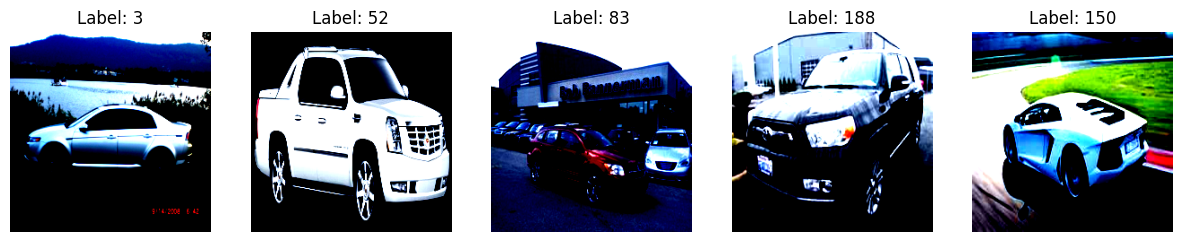

In [47]:
visualize_results(model, valid_loader, device)

In [51]:
target_layers = [model._blocks[-1]]
cam = GradCAM(model=model, target_layers=target_layers)

In [66]:
image_path = './cars_test/cars_test/00001.jpg'
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

In [67]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_float = image.astype(np.float32) / 255.0  
image_uint8 = (image_float * 255).astype(np.uint8)  
input_tensor = val_transforms(image_uint8).unsqueeze(0).to(device)
grayscale_cam = cam(input_tensor=input_tensor)

In [68]:
grayscale_cam = grayscale_cam[0, :]
grayscale_cam = cv2.resize(grayscale_cam, (image.shape[1], image.shape[0]))
grayscale_cam = np.uint8(255 * grayscale_cam)

In [69]:
visualization = show_cam_on_image(image_float, grayscale_cam, use_rgb=True)

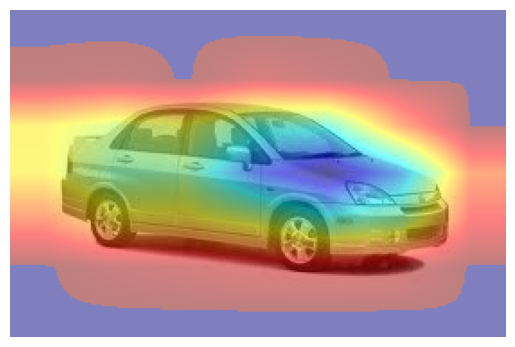

In [70]:
plt.imshow(visualization)
plt.axis('off')
plt.show()

## Выводы
Метрики Recall@1 и Precision@1 показывают, что модель правильно классифицирует только около 12% изображений. Это указывает на то, что модель часто ошибается в классификации.

Метрики Recall@5 и Precision@5 показывают, что модель правильно классифицирует около 27% изображений в топ-5 предсказаниях. Это указывает на то, что модель часто ошибается в классификации, но иногда правильный класс находится в топ-5 предсказаниях.

Модель ошибаеться в классификации изображений, которые визуально похожи, но принадлежат к разным классам

### Пути для улучшения решения

- Увеличение размера датасета
- Использование дополнительных аугментаций
- Оптимизация гиперпараметров модели и обучения
- Использование более сложных архитектур моделей